### Business Objective :-

- The fundamental goal here is to model the CO2 emissions as a function of several car engines features.

### Dataset Details:-
- This dataset contains official CO2 emissions data for various car of different features.


- It has 7385 samples and total 11 features.

- make: Car brand under study.
- model: The specific model of the car.
- vehicle_class: Car body type of the car.
- engine_size: Size of the car engine, in Litres.
- cylinders: Number of cylinders.


- There are few abbreviations that has been used in this data for different features. The abbreviations are listed below:

- 1.Model:
  4WD/4X4 = Four-wheel drive
  AWD = All-wheel drive
  FFV = Flexible-fuel vehicle
  SWB = Short wheelbase
  LWB = Long wheelbase
  EWB = Extended wheelbase

- 2.Transmission :
  A = automatic
  AM = automated manual
  AS = automatic with select shift
  AV = continuously variable
  M = manual
  
- 3.Fuel type:
  X = regular gasoline
  Z = premium gasoline
  D = diesel
  E = ethanol (E85)
  N = natural gas
  
- fuel_consumption_city: City fuel consumption ratings, in litres per 100 kilometres.
- fuel_consumption_hwy: Highway fuel consumption ratings, in litres per 100 kilometres.
- fuel_consumption_comb(l/100km): The combined fuel consumption rating (55% city, 45% highway), in L/100 km.


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor


In [2]:
# reading dataset
data=pd.read_csv('co2_emissions (1).csv',sep=';')
df=data.copy()

In [3]:
df.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244


In [4]:
# information of each features.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            7385 non-null   object 
 1   model                           7385 non-null   object 
 2   vehicle_class                   7385 non-null   object 
 3   engine_size                     7385 non-null   float64
 4   cylinders                       7385 non-null   int64  
 5   transmission                    7385 non-null   object 
 6   fuel_type                       7385 non-null   object 
 7   fuel_consumption_city           7385 non-null   float64
 8   fuel_consumption_hwy            7385 non-null   float64
 9   fuel_consumption_comb(l/100km)  7385 non-null   float64
 10  fuel_consumption_comb(mpg)      7385 non-null   int64  
 11  co2_emissions                   7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)

In [5]:
df.shape

(7385, 12)

In [6]:
# To check column names
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)',
       'fuel_consumption_comb(mpg)', 'co2_emissions'],
      dtype='object')

#### To check null values

In [7]:
df.isnull().sum()

make                              0
model                             0
vehicle_class                     0
engine_size                       0
cylinders                         0
transmission                      0
fuel_type                         0
fuel_consumption_city             0
fuel_consumption_hwy              0
fuel_consumption_comb(l/100km)    0
fuel_consumption_comb(mpg)        0
co2_emissions                     0
dtype: int64

- 1. There are total 7385 rows and 12 columns.
- 2. 5 of the 12 column are of object datatype, 3 integer and 4 are float type.
- 3. We can see that there are total 7 columns with numerical values and other 5 have character values.
- 4. The columns Engine Size(L), Cylinders, Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km), Fuel Consumption Comb (L/100 km), Fuel Consumption Comb (mpg) and CO2 Emissions(g/km) are numerical and continuous in nature.
- 5. The columns Make, Model, Vehicle Class, Transmission and Fuel Type are categorical in nature.


In [8]:
df = df.drop_duplicates()
data1 = data.drop_duplicates()

### Analysing the categorical values

In [9]:
df['make'].unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

In [10]:
df['make'].nunique()

42

In [11]:
df['model'].nunique()

2053

 - There are total 42 car brand in dataset
 - There are total 2053 unique car model.

In [12]:
df['vehicle_class'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [13]:
df['vehicle_class'].nunique()

16

In [14]:
df['transmission'].nunique()

5

In [15]:
df['transmission'].unique()

array(['AS', 'M', 'AV', 'AM', 'A'], dtype=object)

In [16]:
df['fuel_type'].nunique()

5

In [17]:
df['fuel_type'].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

There are five different types of Fuel type present in dataset which are X = regular gasoline Z = premium gasoline D = diesel E = ethanol (E85) N = natural gas.

#### Converting the lables of 'fuel_type' column in to meaningful lables

In [18]:
df['fuel_type'] = df['fuel_type'].replace(['Z', 'D', 'X', 'E', 'N'],
                                          ['Premium Gasoline','Diesel','Regular Gasoline','Ethanol(E85)','Natural Gas'])

In [19]:
df['fuel_type'].value_counts()

Regular Gasoline    3030
Premium Gasoline    2765
Ethanol(E85)         330
Diesel               147
Natural Gas            1
Name: fuel_type, dtype: int64

#### Converting the lables of 'transmission' column in to meaningful lables

In [20]:
df['transmission']=df['transmission'].replace(['AS', 'M', 'AV', 'AM', 'A'],
                                              ['Automatic with Select Shift','Manual','Continuously Variable','Automated Manual','Automatic'])

In [21]:
df['transmission'].value_counts()

Automatic with Select Shift    2720
Automatic                      1536
Manual                         1019
Automated Manual                540
Continuously Variable           458
Name: transmission, dtype: int64

#### Frequency distribution of make column

               make
FORD            575
CHEVROLET       515
BMW             501
MERCEDES-BENZ   365
PORSCHE         296
GMC             289
TOYOTA          274
AUDI            263
NISSAN          213
MINI            200
JEEP            200
KIA             192
VOLKSWAGEN      187
HYUNDAI         184
DODGE           180
HONDA           159
CADILLAC        141
LEXUS           129
MAZDA           127
SUBARU          119
JAGUAR          118
VOLVO           118
BUICK            92
INFINITI         87
LINCOLN          81
LAND ROVER       76
MITSUBISHI       73
RAM              72
CHRYSLER         64
FIAT             56
MASERATI         52
ACURA            51
ROLLS-ROYCE      48
ASTON MARTIN     39
LAMBORGHINI      37
BENTLEY          35
SCION            21
ALFA ROMEO       19
GENESIS          14
SMART             7
SRT               2
BUGATTI           2


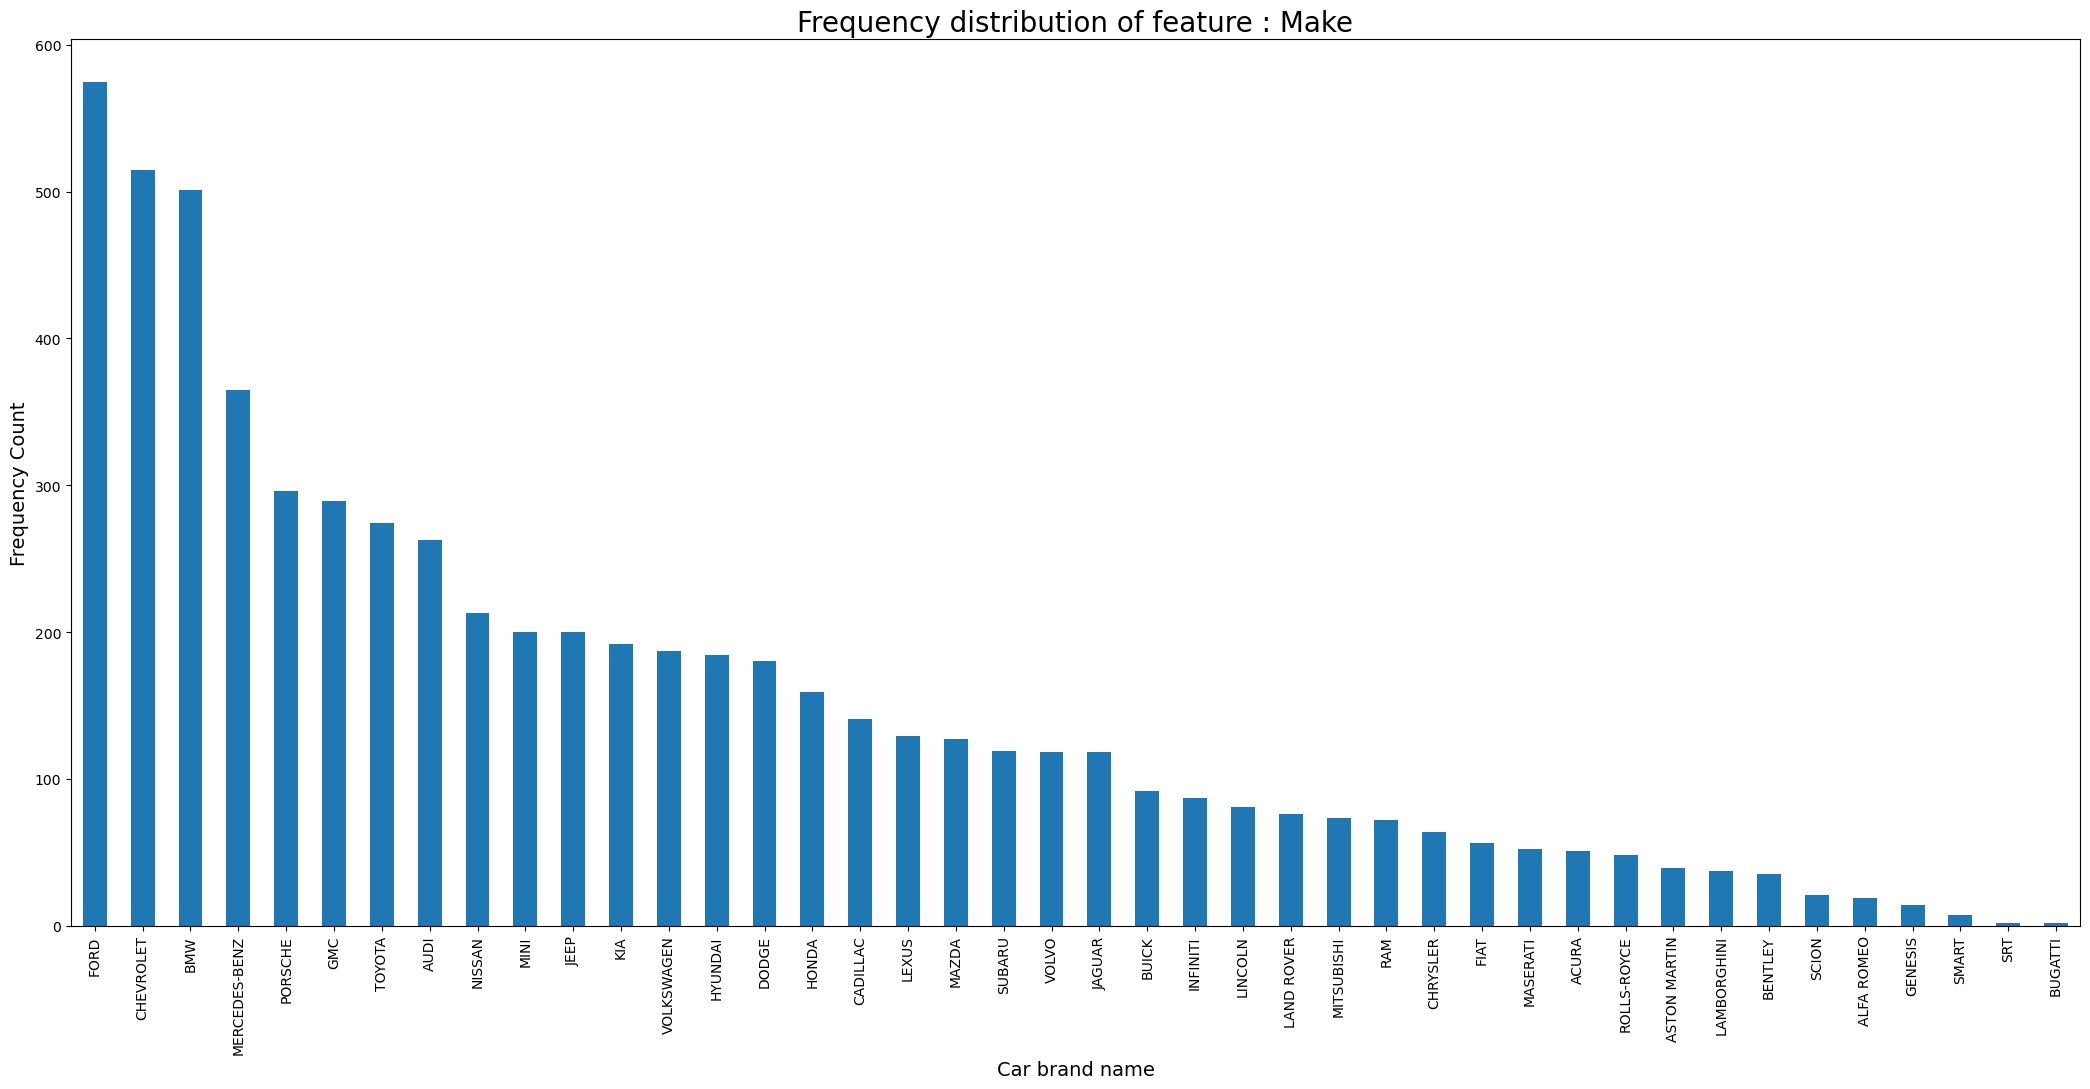

In [22]:
make_freq=pd.DataFrame(df.make.value_counts())
print(make_freq)
plt.figure(figsize=(21,11));
df.groupby('make')['make'].count().sort_values(ascending=False).plot(kind='bar')
plt.title('Frequency distribution of feature : Make', fontsize=20)
plt.ylabel('Frequency Count', fontsize=14)
plt.xlabel('Car brand name',fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Frequency distribution of Top 30 Car models

Top 30 car models out of total 2053 car models:
               model
F-150 FFV         32
F-150 FFV 4X4     31
MUSTANG           26
FOCUS FFV         24
F-150 4X4         20
F-150             19
SONIC 5           18
ATS               18
JETTA             18
COMPASS           18
CAMARO            17
SONIC             17
SILVERADO         16
SIERRA 4WD        16
TACOMA 4WD        16
SILVERADO 4WD     16
PATRIOT           16
ACCORD            16
COROLLA           16
SIERRA            16
PASSAT            15
CHARGER FFV       15
FUSION            15
FORTE 5           15
FORTE KOUP        15
CANYON            14
COLORADO          14
BEETLE            14
FIT               13
OUTBACK AWD       13


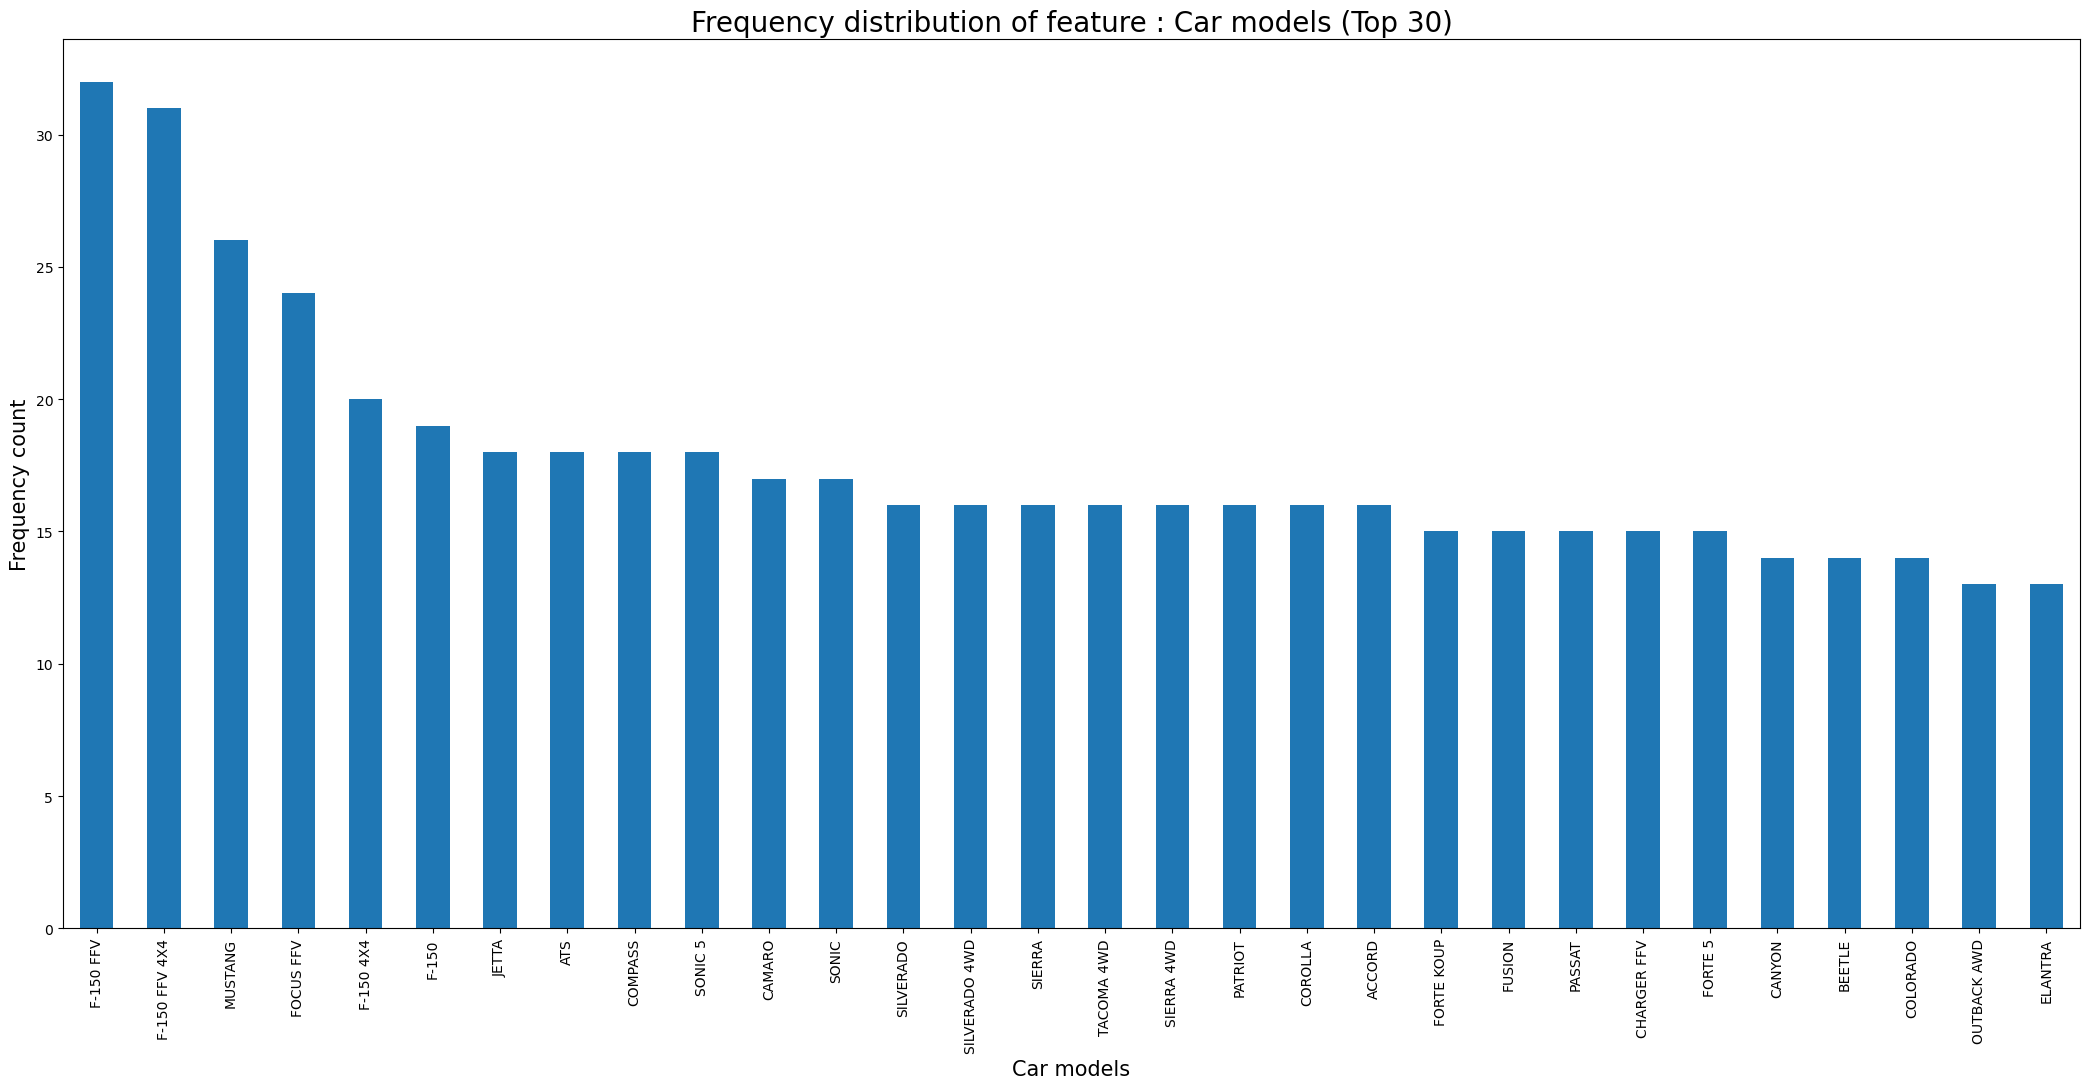

In [23]:
print(f"Top 30 car models out of total {df['model'].nunique()} car models:")
print((pd.DataFrame(df['model'].value_counts().sort_values(ascending=False)[:30])))

plt.figure(figsize=(21,11));
df.groupby('model')['model'].count().sort_values(ascending=False)[:30].plot(kind="bar")
plt.title('Frequency distribution of feature : Car models (Top 30)', fontsize=20)
plt.ylabel('Frequency count', fontsize=15)
plt.xlabel('Car models', fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Frequency distribution of 'Vehicle class'

Vehicle Class:
                          vehicle_class
SUV - SMALL                        1004
MID-SIZE                            981
COMPACT                             902
SUV - STANDARD                      613
SUBCOMPACT                          532
FULL-SIZE                           508
PICKUP TRUCK - STANDARD             474
TWO-SEATER                          381
MINICOMPACT                         274
STATION WAGON - SMALL               212
PICKUP TRUCK - SMALL                133
VAN - PASSENGER                      66
SPECIAL PURPOSE VEHICLE              65
MINIVAN                              61
STATION WAGON - MID-SIZE             45
VAN - CARGO                          22


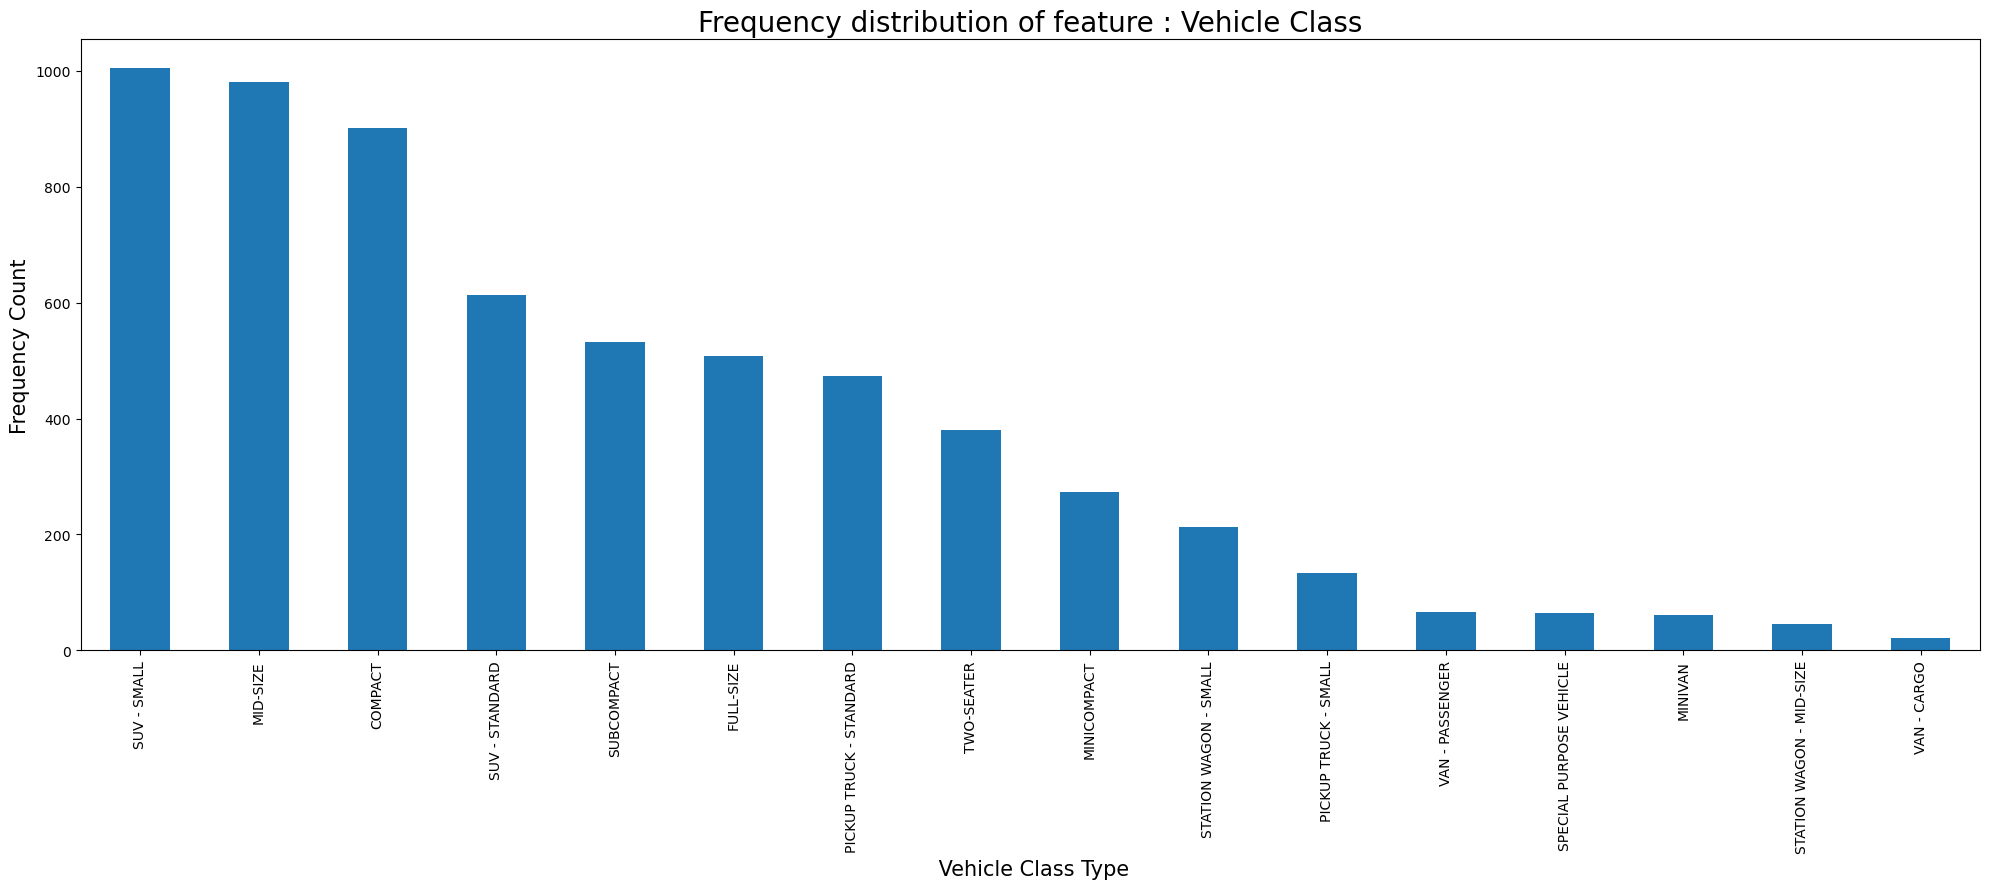

In [24]:
print('Vehicle Class:')
print(pd.DataFrame(df['vehicle_class'].value_counts()))

plt.figure(figsize=(20,9))
df.groupby('vehicle_class')['vehicle_class'].count().sort_values(ascending=False).plot(kind='bar')

plt.title('Frequency distribution of feature : Vehicle Class', fontsize=20)

plt.ylabel('Frequency Count', fontsize=15)
plt.xlabel(' Vehicle Class Type', fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Frequency distribution of 'Transmission' column

Transmission:
                             transmission
Automatic with Select Shift          2720
Automatic                            1536
Manual                               1019
Automated Manual                      540
Continuously Variable                 458


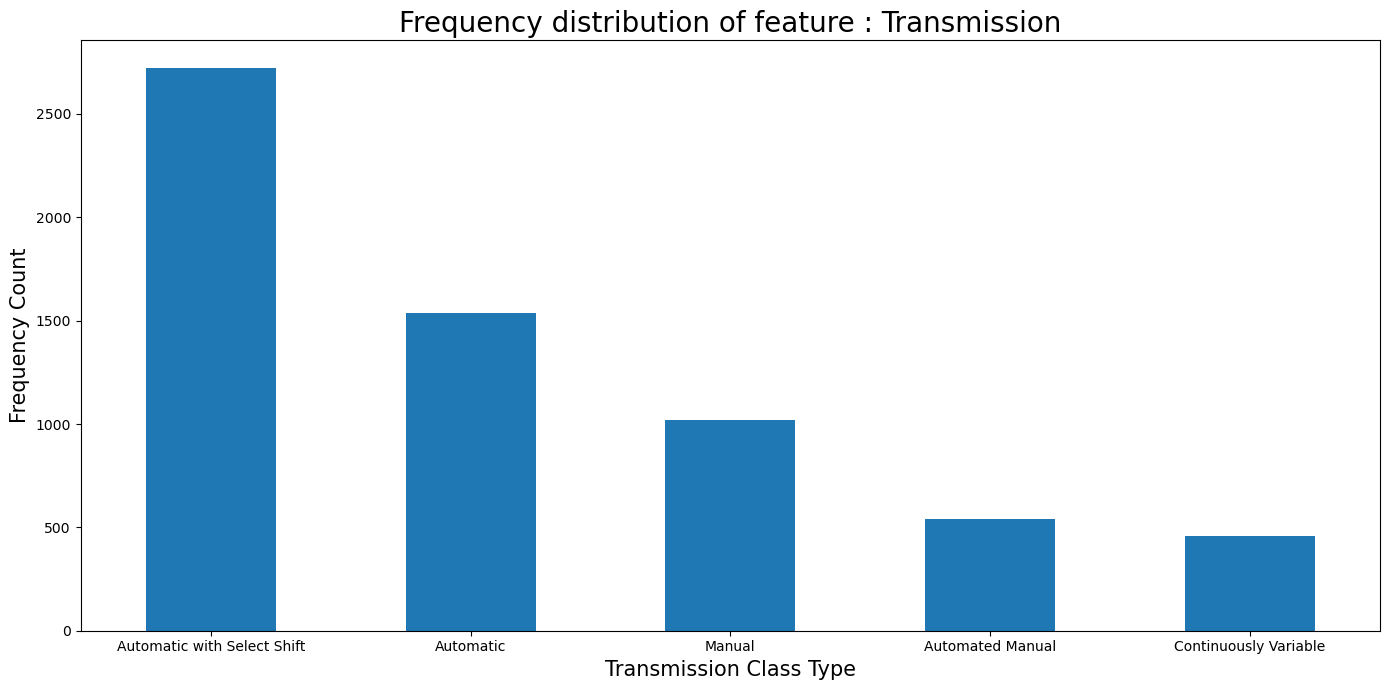

In [25]:
print('Transmission:')
print(pd.DataFrame(df['transmission'].value_counts()))

plt.figure(figsize=(14,7))
df.groupby('transmission')['transmission'].count().sort_values(ascending=False).plot(kind='bar')

plt.title('Frequency distribution of feature : Transmission', fontsize=20)

plt.ylabel('Frequency Count', fontsize=15)
plt.xlabel('Transmission Class Type', fontsize=15)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Frequency distribution of 'Fuel type' column

Fuel Type
                  fuel_type
Regular Gasoline       3030
Premium Gasoline       2765
Ethanol(E85)            330
Diesel                  147
Natural Gas               1


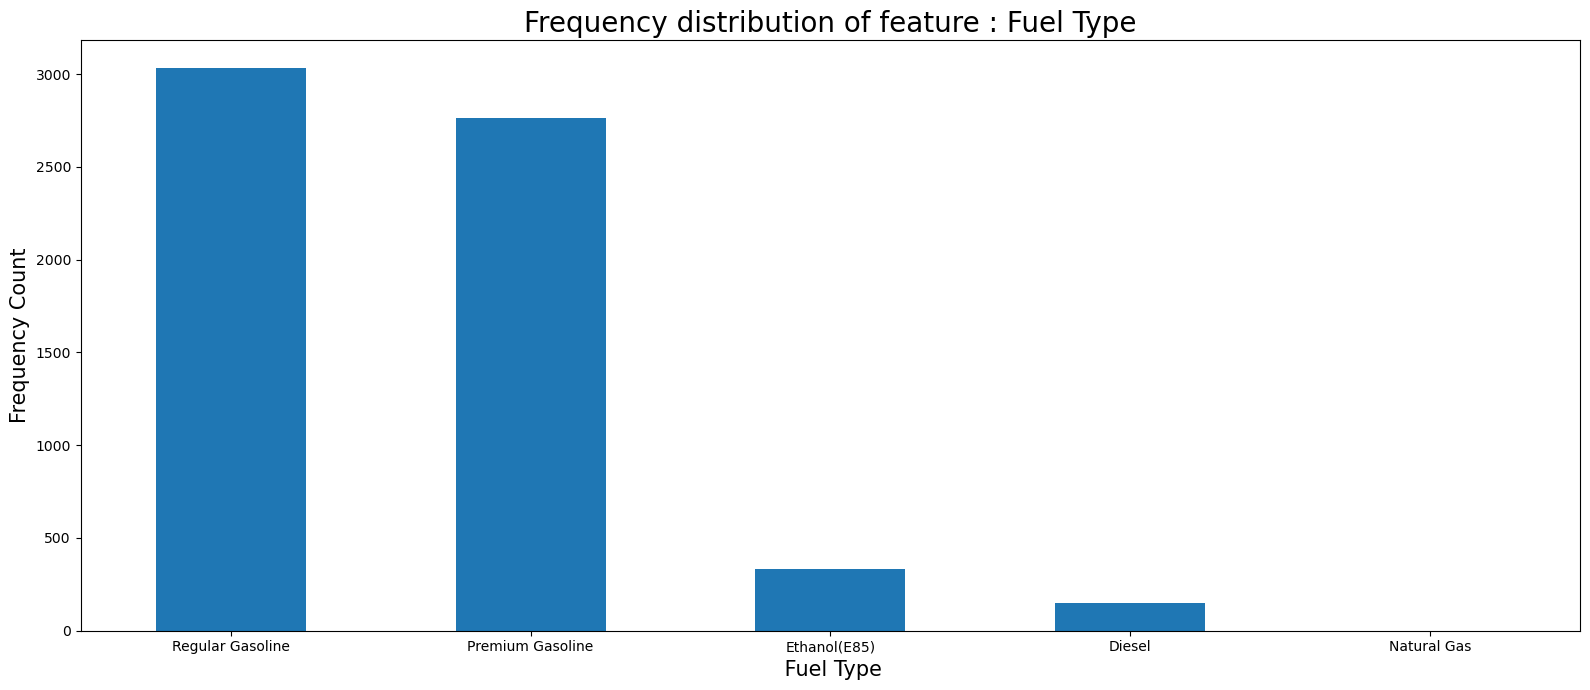

In [26]:
print('Fuel Type')
print((pd.DataFrame(df["fuel_type"].value_counts())))

plt.figure(figsize=(16,7))

df.groupby('fuel_type')["fuel_type"].count().sort_values(ascending=False).plot(kind='bar')

plt.title("Frequency distribution of feature : Fuel Type", fontsize=20)
plt.ylabel('Frequency Count', fontsize=15)
plt.xlabel(" Fuel Type", fontsize=15)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- 1.Out of 42 car brands Ford(628),CHEVROLET(588),BMW(527),MERCEDES-BENZ (419) are most dominating ones.Meanwhile SMART(7),BUGATI(3)andSRT(2)are the ones with lowest frequency.

- 2.SUV-Small(1217),MID-Size(1133) and COMPACT(1022) vehicles are the most frequent ones in vechicle class column.

- 3.Frequency of car with Transmission type Automatic with Select Shift(3127) is the highest followed by Automatic(1851) and with Continuously Variable Transmission(576) is the lowest.

- 4.Car which runs on Gasoline let it be Regular(3637) or Premium(3202) is the most common vehicle type. And cars running on Diesel(175) are very low in frquency and there is only one sample which uses Natural Gases.

#### Variation of co2 emission with different features

#### Feature: Make

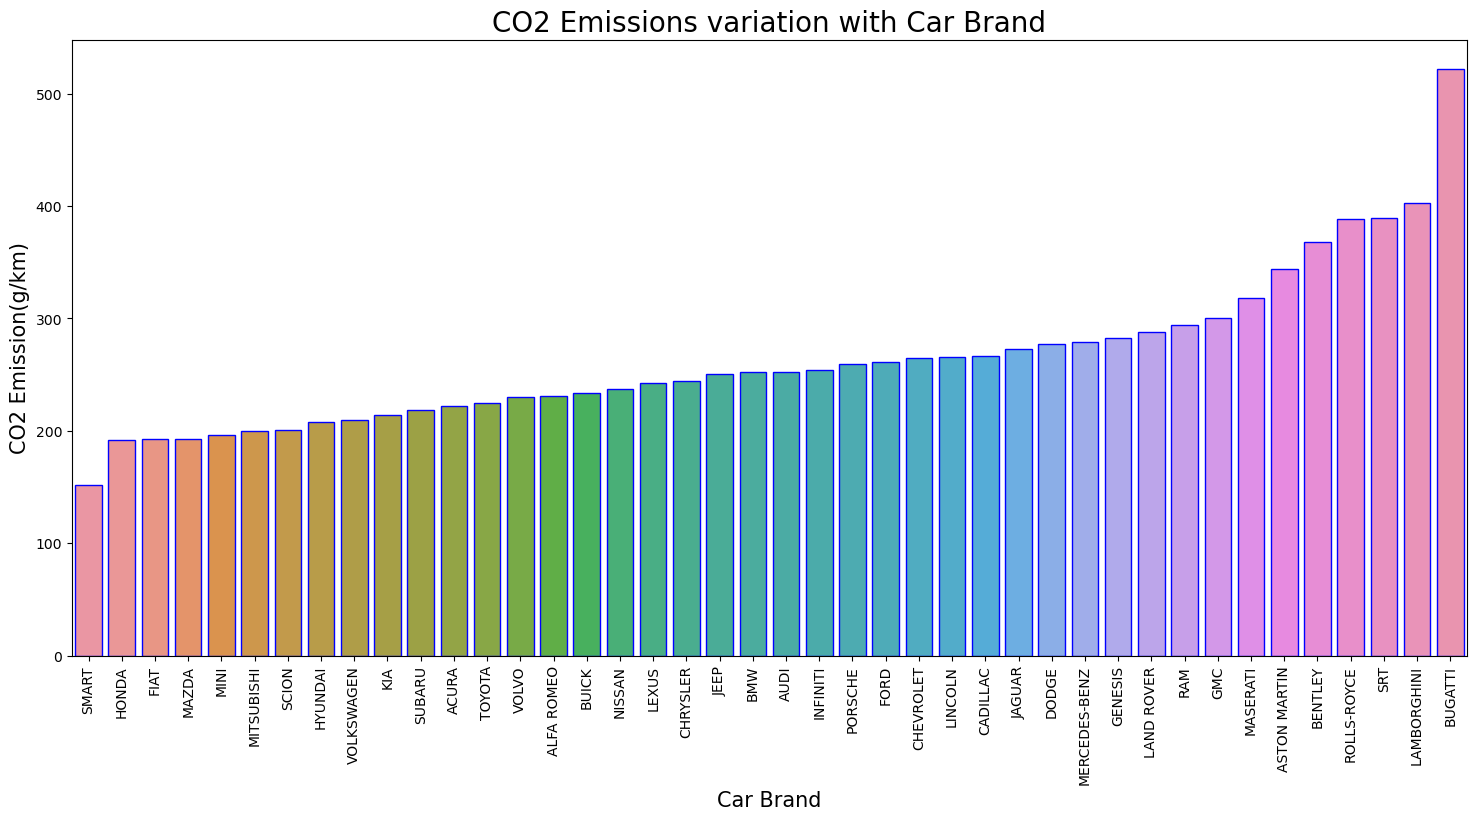

In [27]:
co2_make_=df.groupby('make')['co2_emissions'].mean().sort_values().reset_index()

plt.figure(figsize=(18,8))
sns.barplot(x='make',y='co2_emissions',data=co2_make_,edgecolor='blue')

plt.title('CO2 Emissions variation with Car Brand',fontsize=20)
plt.xlabel('Car Brand',fontsize=15)
plt.ylabel('CO2 Emission(g/km)',fontsize=15)
plt.xticks(rotation=90)
# plt.tight_layout()
plt.show()
# The amount of CO2 a car emits into the atmosphere is measured in grams per kilometre - often shortened to g/km
# which is considered to be a basic indication of a car's impact on the environment and air quality

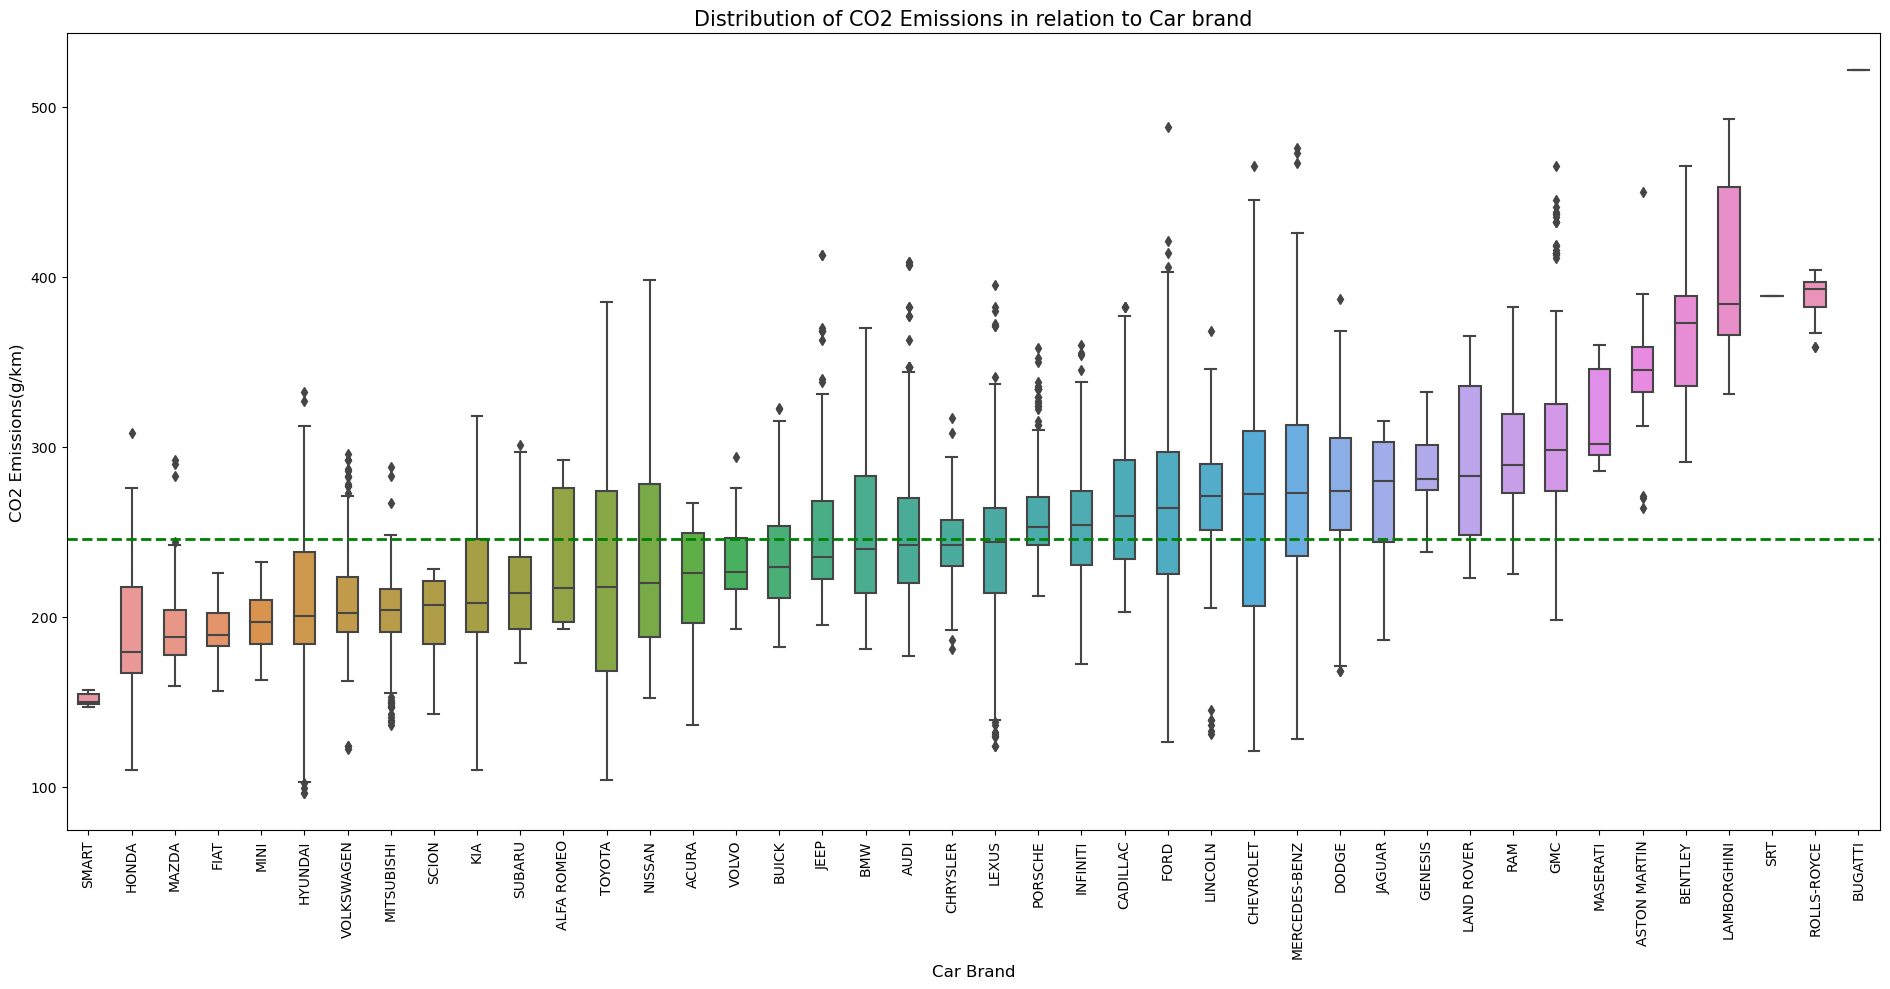

In [28]:
plt.figure(figsize=(19,10))

order_ = df.groupby("make")["co2_emissions"].median().sort_values(ascending=True).index

sns.boxplot(x="make", y="co2_emissions", data=df,order=order_, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Car brand", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Car Brand", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df['co2_emissions'].median(),color='g',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

**1.** From both the bar plot and the box plot we can say that average CO2 emissions of cars belonging to the  car brand BUGATTI is the highest and cars of SMART has the lowest emissions.

**2.** The red line signify the sample mean of CO2 emissions.

**3.** Almost 50% of the brand has their median CO2 emissions less than the sample median of CO2 emissions by all the cars.

#### Feature:Vehicle class

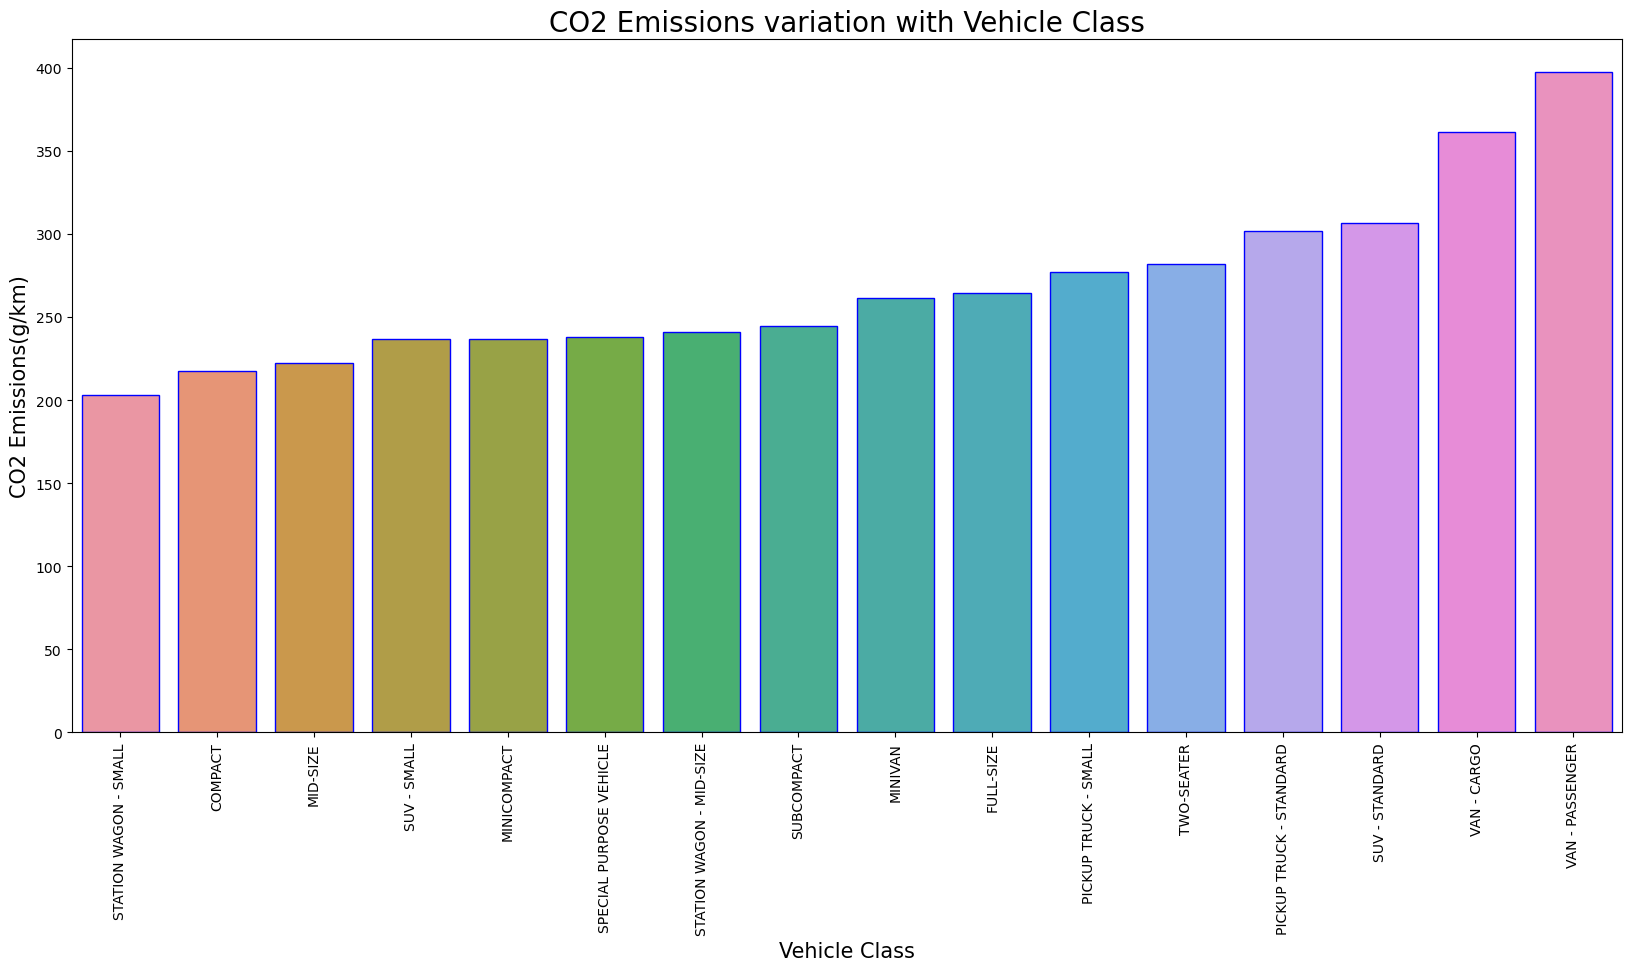

In [29]:
co2_vehicle_class = df.groupby(['vehicle_class'])['co2_emissions'].mean().sort_values().reset_index()

plt.figure(figsize=(20,9))
sns.barplot(x='vehicle_class',y='co2_emissions',data=co2_vehicle_class,edgecolor='b')
plt.title('CO2 Emissions variation with Vehicle Class',fontsize=20)
plt.xlabel('Vehicle Class',fontsize=15)
plt.ylabel('CO2 Emissions(g/km)',fontsize=15)
plt.xticks(rotation=90)
plt.show()

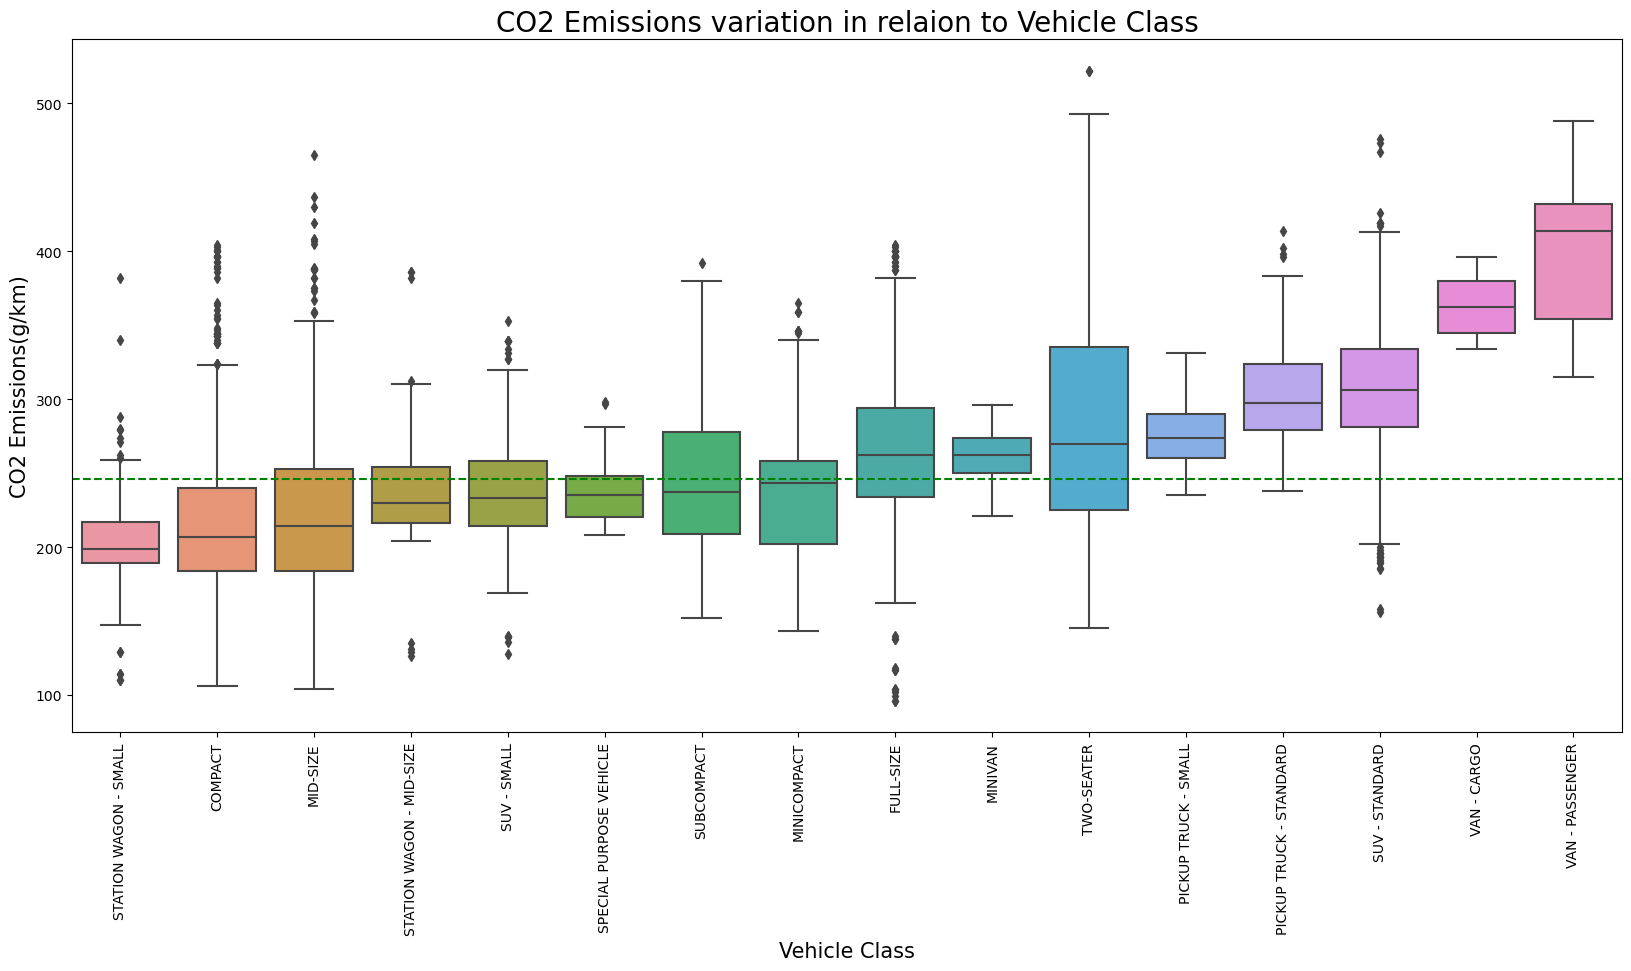

In [30]:
co2_vehicle_order = df.groupby(['vehicle_class'])['co2_emissions'].median().sort_values(ascending=True).index

plt.figure(figsize=(20,9))
sns.boxplot(x='vehicle_class',y='co2_emissions',data=df,order=co2_vehicle_order)
plt.title('CO2 Emissions variation in relaion to Vehicle Class',fontsize=20)
plt.xlabel('Vehicle Class',fontsize=15)
plt.ylabel('CO2 Emissions(g/km)',fontsize=15)
plt.xticks(rotation=90)
plt.axhline(df['co2_emissions'].median(),color='g',linestyle='dashed')
plt.show()

**1.** The vehicle of class VAN-Passenger followed by VAN-Cargo has the highest CO2 emissions among all. And Station Wagon-Small has the lowest CO2 emissions.

**2.** There are 8 types of vehicle class out of 16 which has a median CO2 emissions less than sample median of CO2 emissions and the other 8 has a higher median.

#### Feature:Transmission

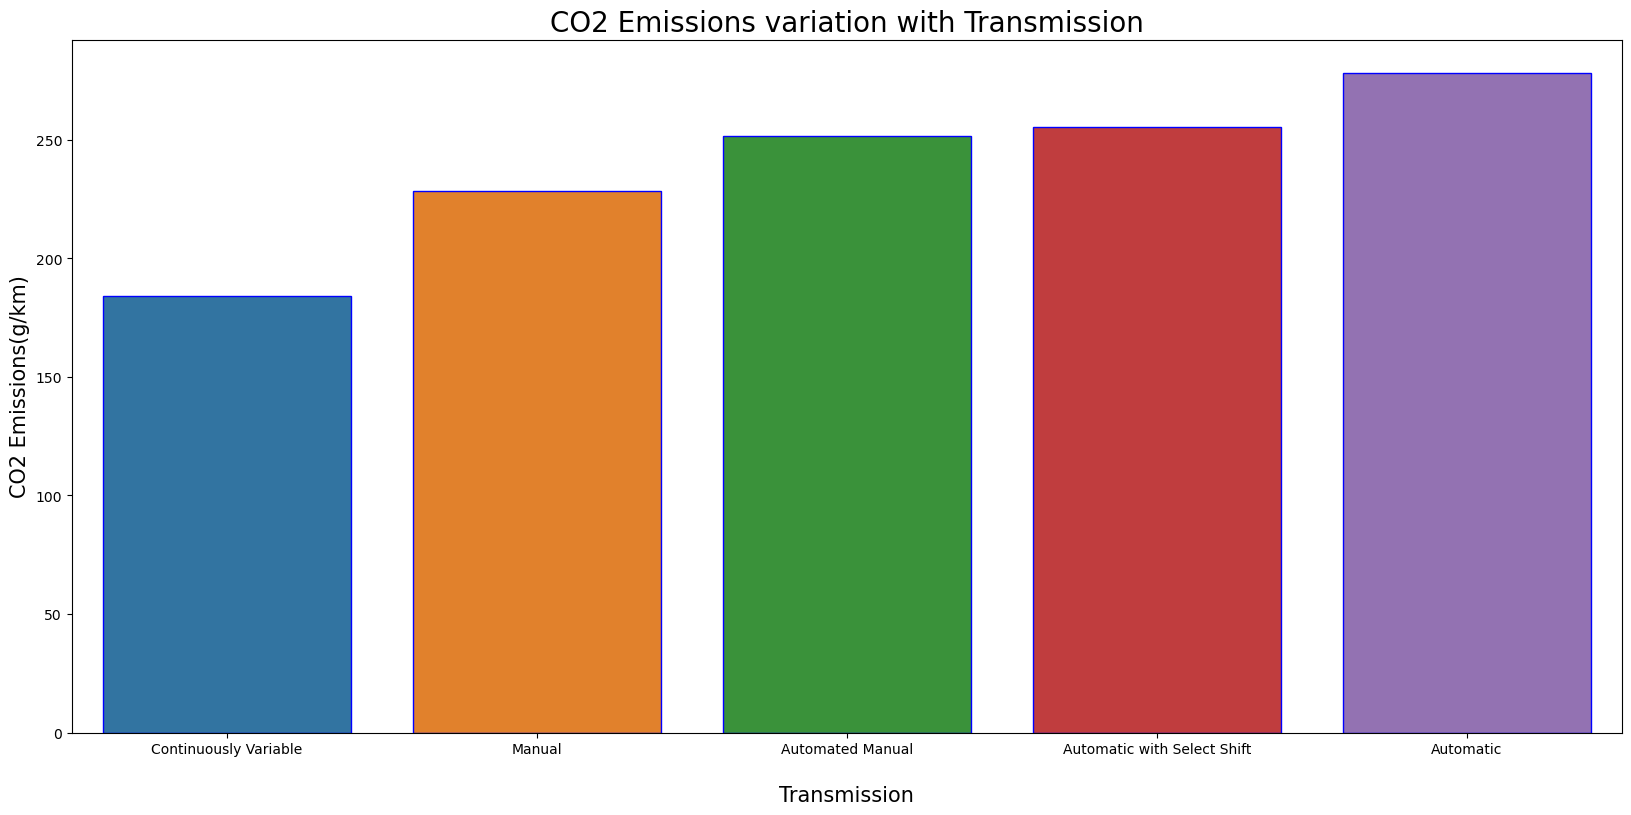

In [31]:
co2_transmission = df.groupby(['transmission'])['co2_emissions'].mean().sort_values().reset_index()

plt.figure(figsize=(20,9))
sns.barplot(x='transmission',y='co2_emissions',data=co2_transmission,edgecolor='b')
plt.title('CO2 Emissions variation with Transmission',fontsize=20)
plt.xlabel('\nTransmission',fontsize=15)
plt.ylabel('CO2 Emissions(g/km)',fontsize=15)
plt.xticks()
plt.show()

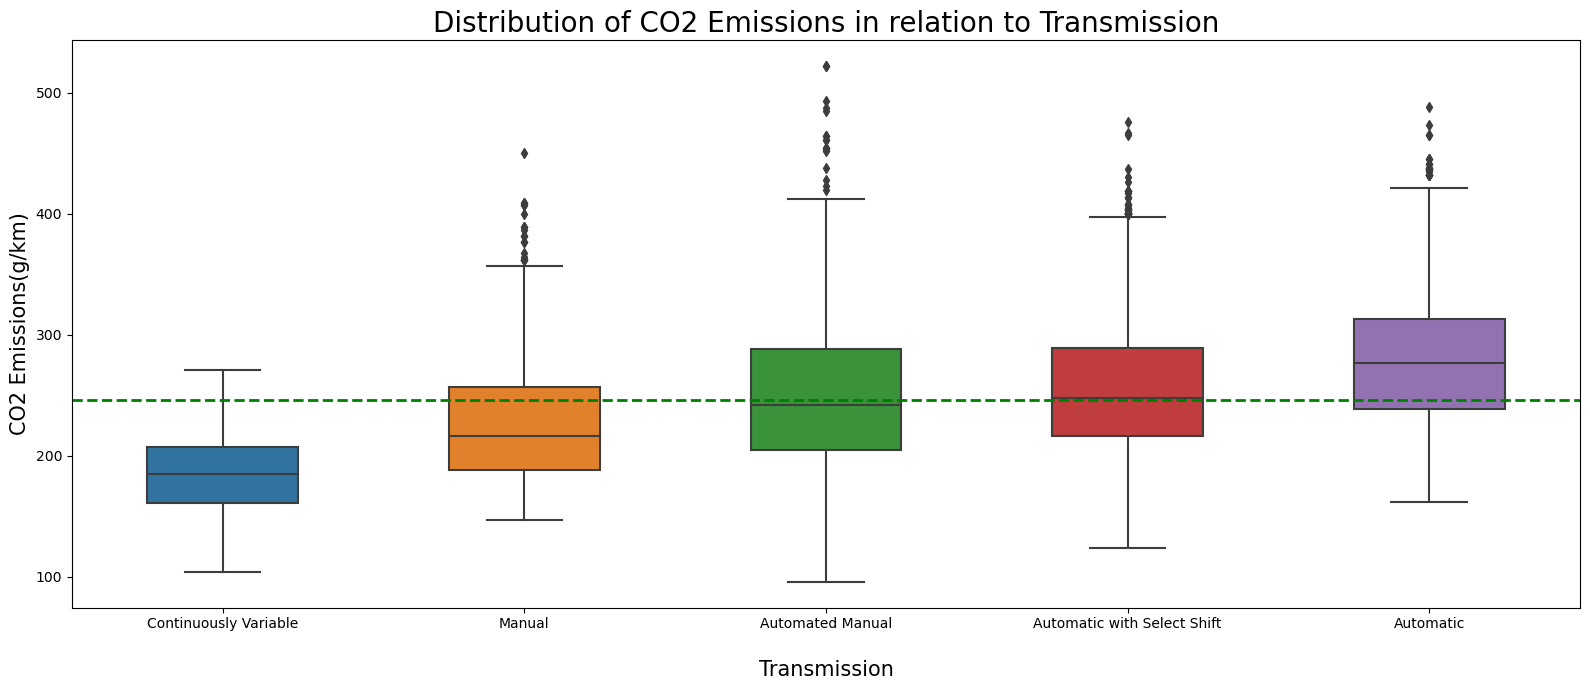

In [32]:
order = df.groupby('transmission')['co2_emissions'].median().sort_values(ascending=True).index

plt.figure(figsize=(16,7))

sns.boxplot(x="transmission", y="co2_emissions", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Transmission", fontsize=20)
plt.xlabel("\nTransmission", fontsize=15)
plt.ylabel("CO2 Emissions(g/km)", fontsize=15)
plt.axhline(df['co2_emissions'].median(),color='g',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

**1.** Vehicles with Automatic transmission exhibit highest CO2 emissions and vehicle with Continuously Variable Transmission shows the lowest CO2 emissions.

**2.** Median CO2 emissions of Automated Manual and Automatic with Select Shift vehicles is almost similar to that of sample median CO2 emissions.

#### Feature : Fuel Type

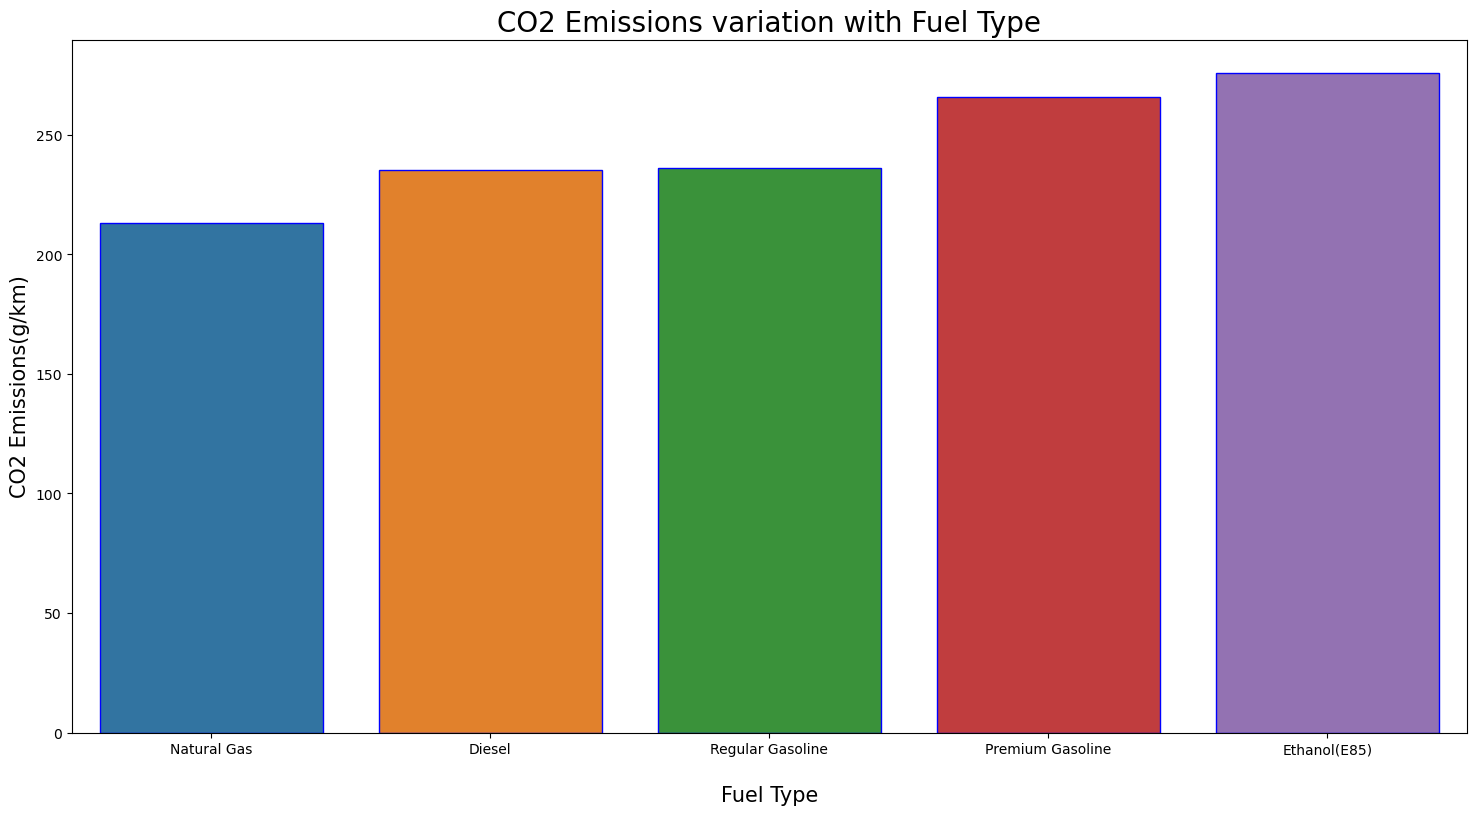

In [33]:
co2_fuel=df.groupby('fuel_type')['co2_emissions'].mean().sort_values().reset_index()

plt.figure(figsize=(18,9))
sns.barplot(data=co2_fuel,x='fuel_type',y='co2_emissions',edgecolor='b')
plt.title('CO2 Emissions variation with Fuel Type', fontsize=20)
plt.xlabel('\nFuel Type', fontsize=15)
plt.ylabel('CO2 Emissions(g/km)', fontsize=15)
plt.show()

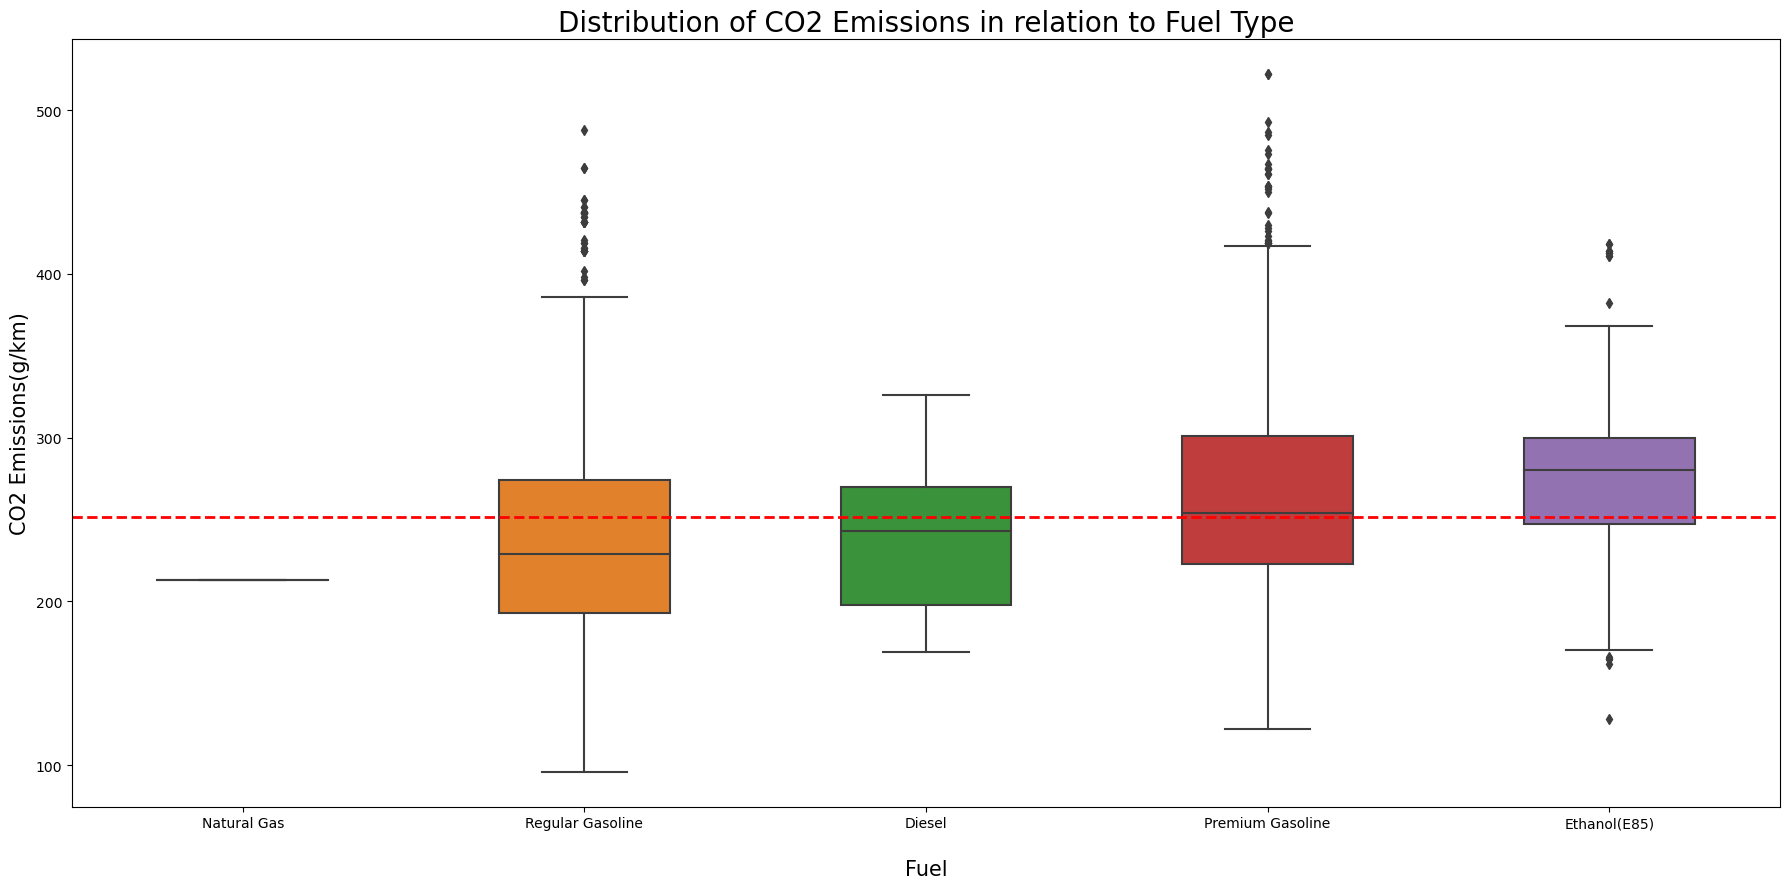

In [34]:
order = df.groupby('fuel_type')['co2_emissions'].median().sort_values(ascending=True).index

plt.figure(figsize=(18,9))

sns.boxplot(x='fuel_type', y='co2_emissions', data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Fuel Type", fontsize=20)
plt.xlabel("\nFuel", fontsize=15)
plt.ylabel("CO2 Emissions(g/km)", fontsize=15)
plt.xticks(rotation=0, horizontalalignment='center')
plt.axhline(df['co2_emissions'].mean(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

**1.** Cars running on Ethanol(E85) has the highest CO2 emissions with almost all the values hisger than the sample median CO2 emissions.

**2.**  Natural Gas has the lowest CO2 emissions, but there is only one vehicle that use it as fuel. Other than that Regular Gasoline has the lowest CO2 emissions with almost 75% values less than sample median.

**3.**  The median CO2 emissions of fuel type Premiuim Gasoline and Diesel has almost similar median to that of the sample median

### Analysing the Numerical values

#### Descriptive Statistics

In [35]:
from tabulate import tabulate
descriptive=df.describe().T.drop(['count'],axis=1)
descriptive=pd.concat([descriptive,df.skew()],axis=1)
descriptive.columns=['mean', 'std','min','25%','median','75%','max','skew']
cols = ["mean", "25%", "median", "75%", "std", "skew", "min", "max"]
descriptive=descriptive[cols]
print(tabulate(descriptive, headers="keys", floatfmt=".2f"))
# descriptive

                                  mean     25%    median     75%    std    skew    min     max
------------------------------  ------  ------  --------  ------  -----  ------  -----  ------
engine_size                       3.16    2.00      3.00    3.70   1.37    0.81   0.90    8.40
cylinders                         5.62    4.00      6.00    6.00   1.85    1.11   3.00   16.00
fuel_consumption_city            12.62   10.10     12.10   14.70   3.55    0.84   4.20   30.60
fuel_consumption_hwy              9.07    7.50      8.70   10.30   2.28    1.11   4.00   20.60
fuel_consumption_comb(l/100km)   11.02    8.90     10.60   12.70   2.95    0.93   4.10   26.10
fuel_consumption_comb(mpg)       27.40   22.00     27.00   32.00   7.23    0.92  11.00   69.00
co2_emissions                   251.25  208.00    246.00  289.00  59.24    0.56  96.00  522.00


1. The range of our target CO2 Emissions is between 96 and 522.

2. Mean CO2 emissions is 250.58 and median is 246.

3. 25% of the sample points has CO2 emissions within 208 and 75% has within 288.

4. All the features are positively skewed.

5. Cylinders and Fuel Consumption Hwy (L/100 km) seems significantly more skewed than the other features.

6. CO2 Emissions(g/km) is the least skewed feature.

7. Other than the regressor feature, among the predictors Engine Size(L) and Fuel Consumption City (L/100 km) are the least skewed features.

### To check the distribution of skewness of each feature

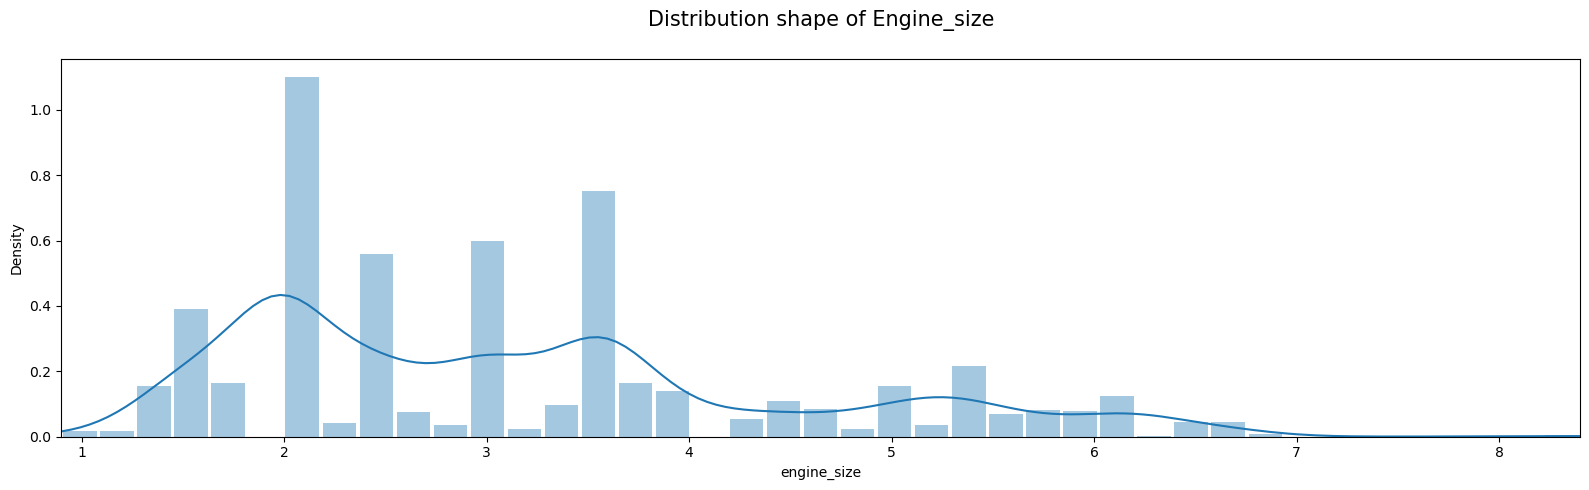

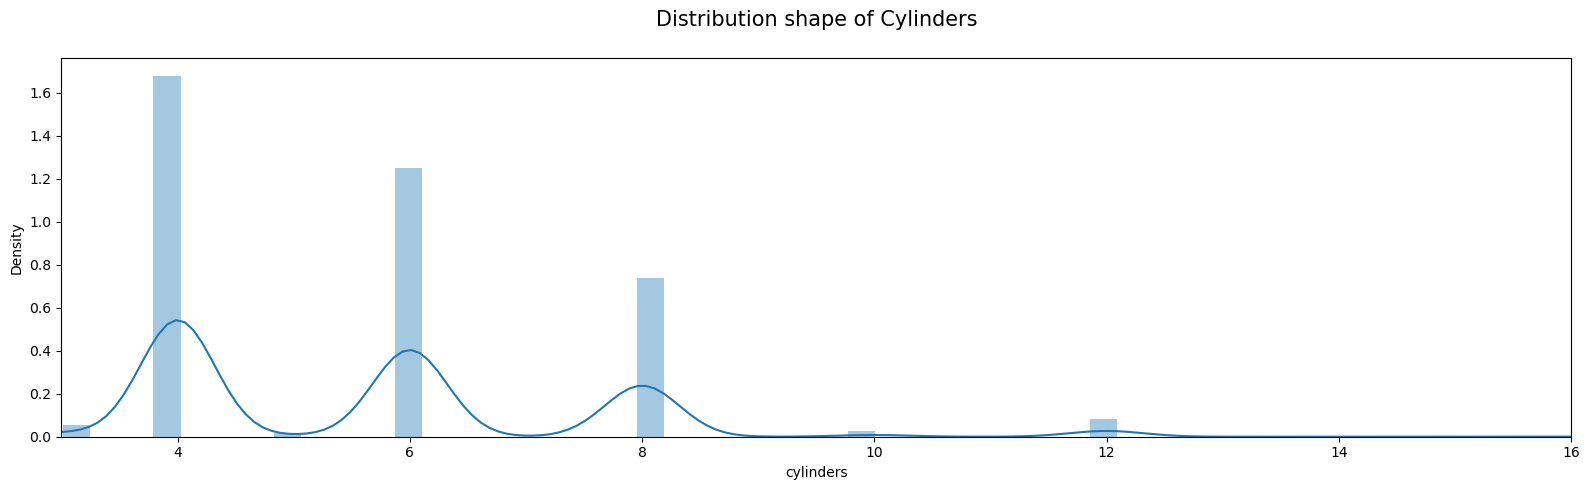

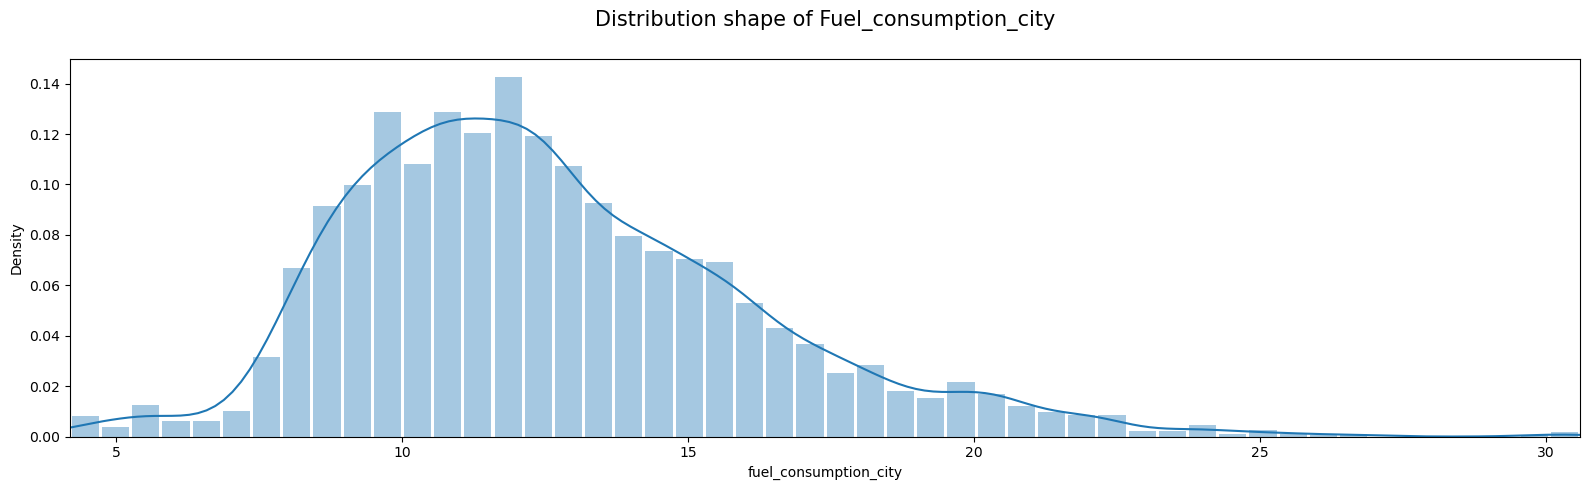

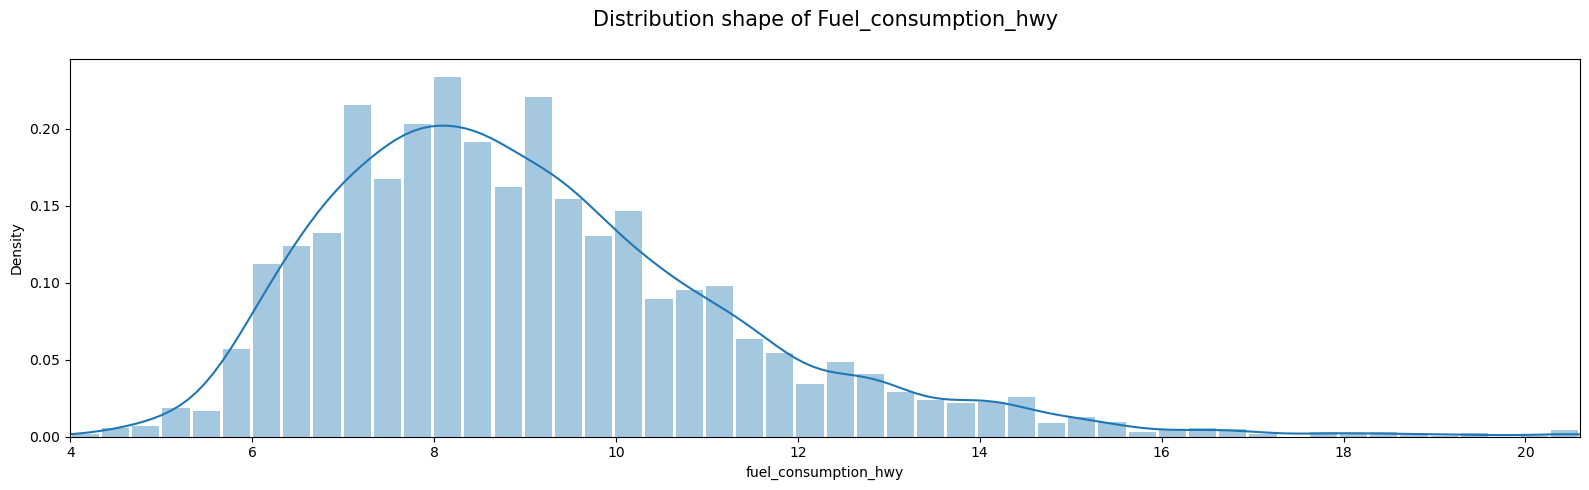

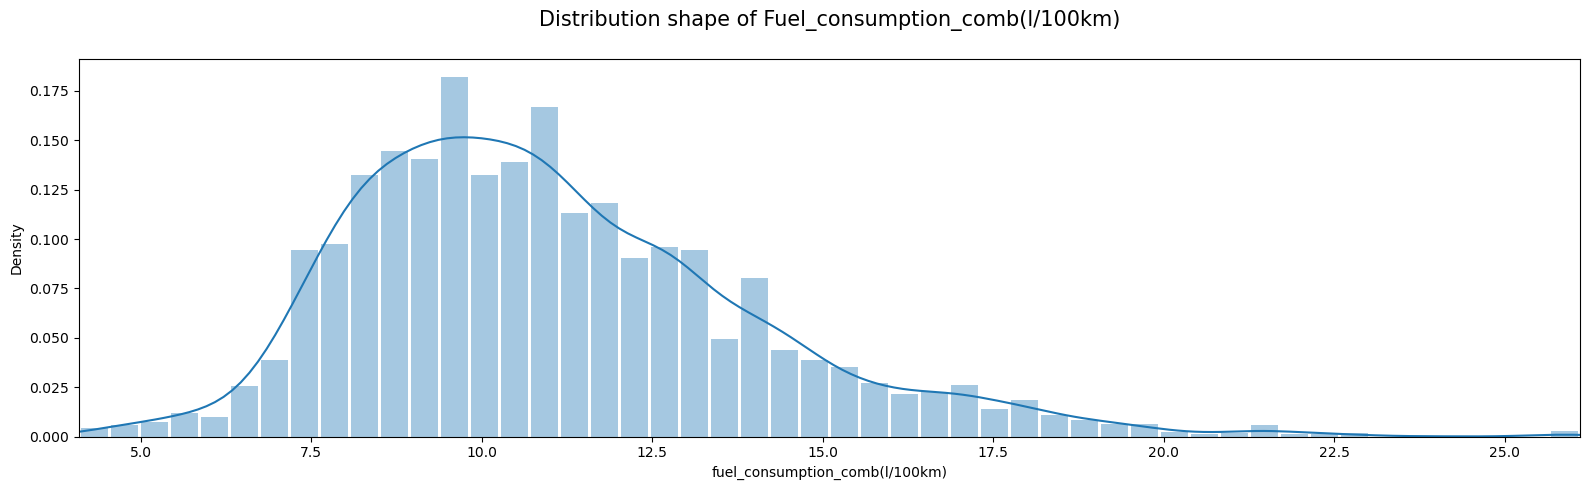

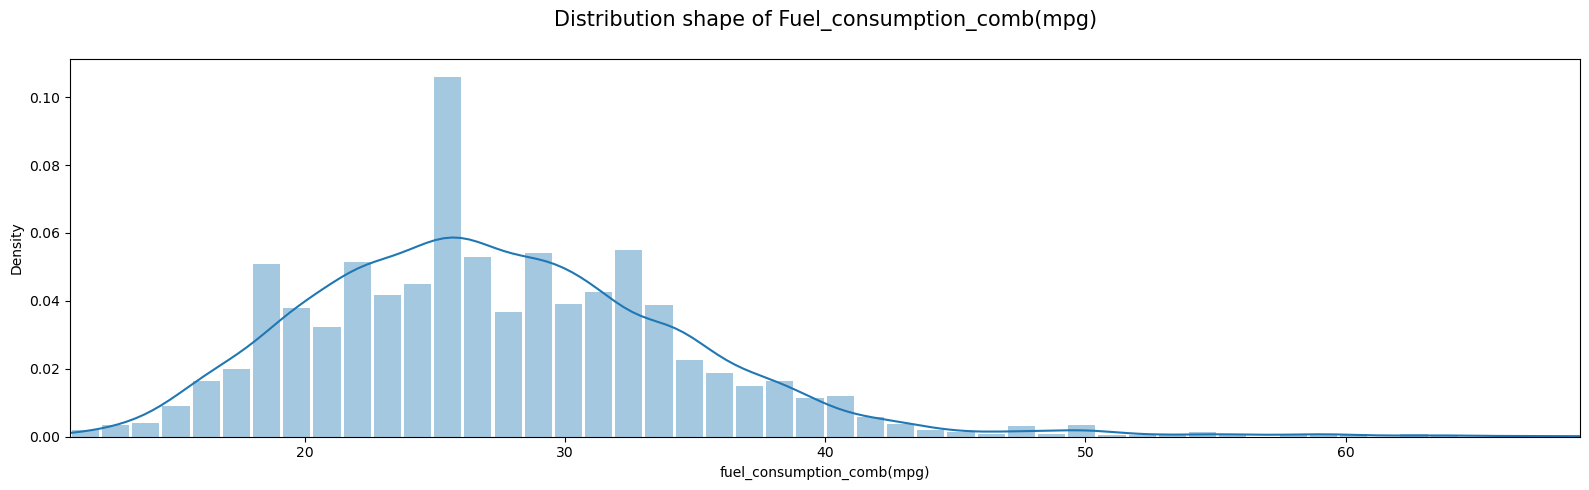

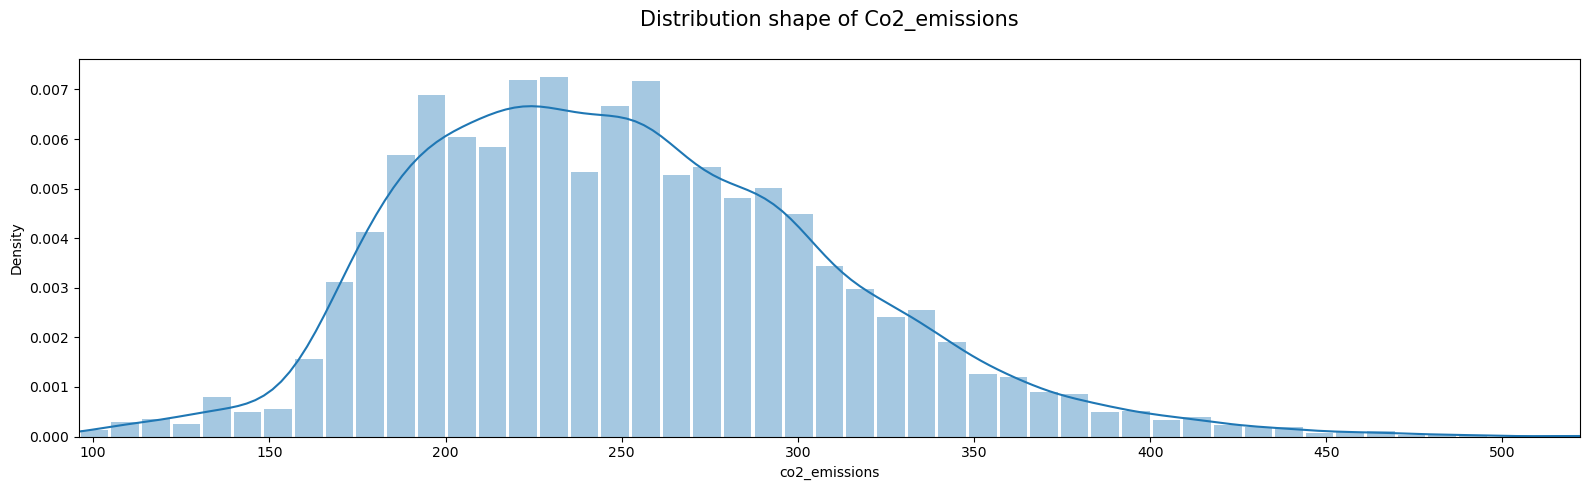

In [36]:
for feature in df.select_dtypes("number").columns:

    plt.figure(figsize=(16,5))
    sns.distplot(df[feature], hist_kws={"rwidth": 0.9})
    plt.xlim(df[feature].min(), df[feature].max())
    plt.title(f"Distribution shape of {feature.capitalize()}\n", fontsize=15)
    plt.tight_layout()
    plt.show()

1. Cylinder feature has discrete values so it is the most positively skewes distribution.
2. CO2 Emission in turn is the one which looks more similar to a normally distributed curve than the others.

### To visualize the distribution of the dependent varibale using a Frequency Distribution plot and a Box plot

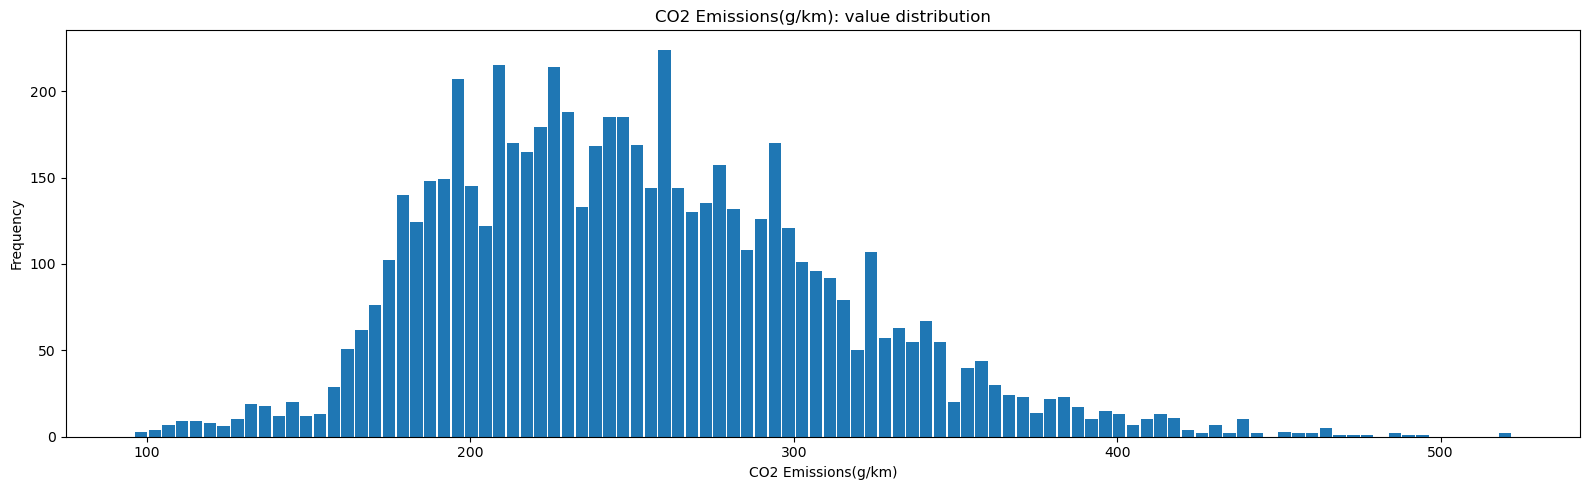

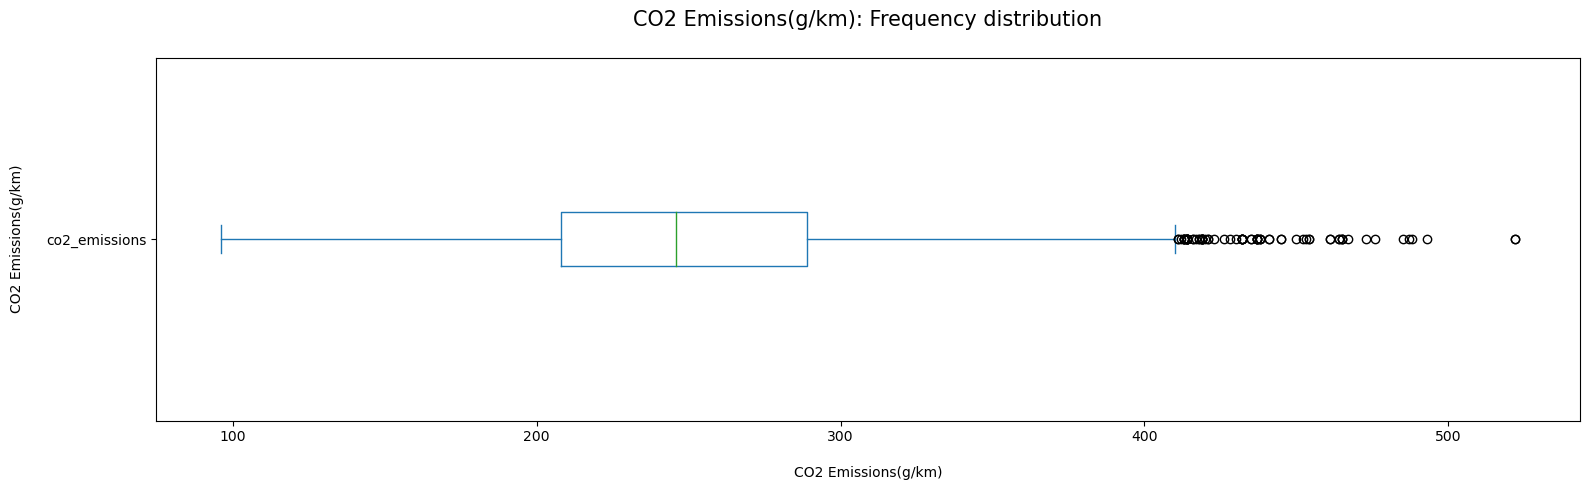

In [37]:
plt.figure(figsize=(16,5))
df["co2_emissions"].plot(kind="hist", bins=100, rwidth=0.9)
plt.title("CO2 Emissions(g/km): value distribution")
plt.xlabel("CO2 Emissions(g/km)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,5))
df["co2_emissions"].plot(kind="box", vert=False)
plt.title("CO2 Emissions(g/km): Frequency distribution\n", fontsize=15)
plt.xlabel("\nCO2 Emissions(g/km)")
# plt.yticks([0], [''])
plt.ylabel("CO2 Emissions(g/km)\n", rotation=90)
plt.tight_layout()
plt.show()

From the Box plot we can say that
1. The minimum vale of the CO2 emission is around 96.
2. The median CO2 emission is 246.
3. The 25% of the samples have CO2 emission between 96 and 208.
4. The 75% of the samples have CO2 emission between 96 and 288.
5. There are no outliers in the lower half but there are outliers in the upper half.¶
6. The maximum CO2 emissions observed is 522 which is an outlier.
7. The distribution of CO2 emissions is positively skewed.

### Corelation Matrix

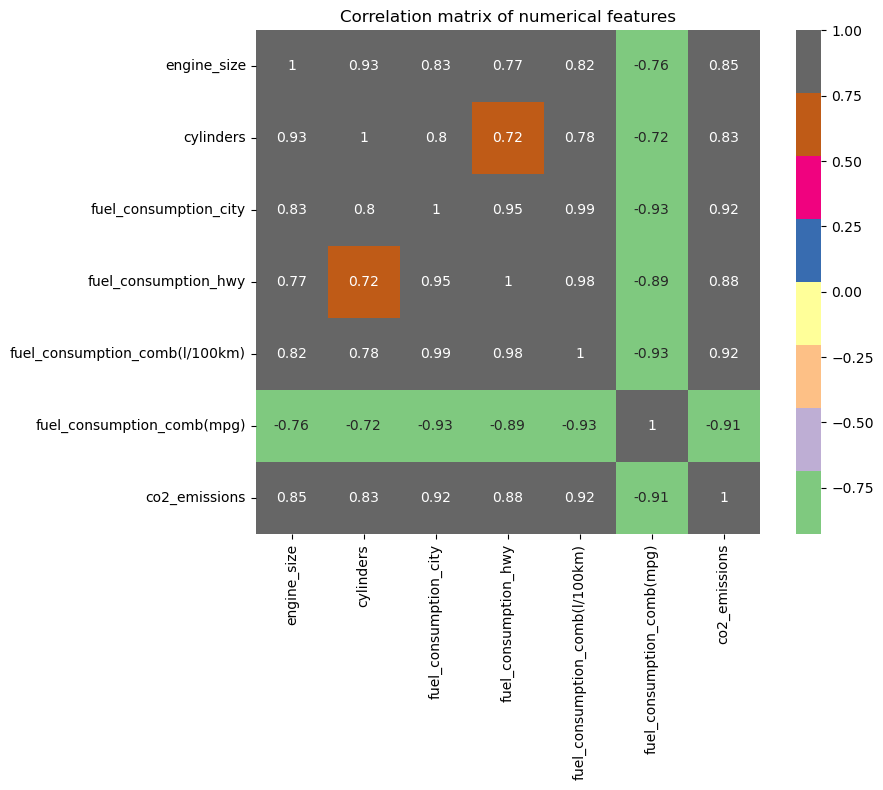

In [38]:
corr=df.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='Accent',square=True)
plt.title('Correlation matrix of numerical features')
plt.tight_layout()
plt.show()

1. Fuel Consumption Comb (mpg) is negatively correlated to all the features.
2. All the other features are postively correlated with each other.
3. Both Fuel Consumption City (L/100 km) and Fuel Consumption Hwy (L/100 km) have very strong positive correlation of 0.99 and 0.98 with Fuel Consumption Comb (L/100 km), since Fuel Consumption Comb (L/100 km) is redundant.
4. Our dependent variable CO2 Emissions(g/km) has highest positive correlation of 0.92 with Fuel Consumption City (L/100 km) and Fuel Consumption Comb (L/100 km) and strong negative correlation of -0.91 with Fuel Consumption Comb (mpg).

### Variation in CO2 emissions with different features

#### Feature:Cylinders

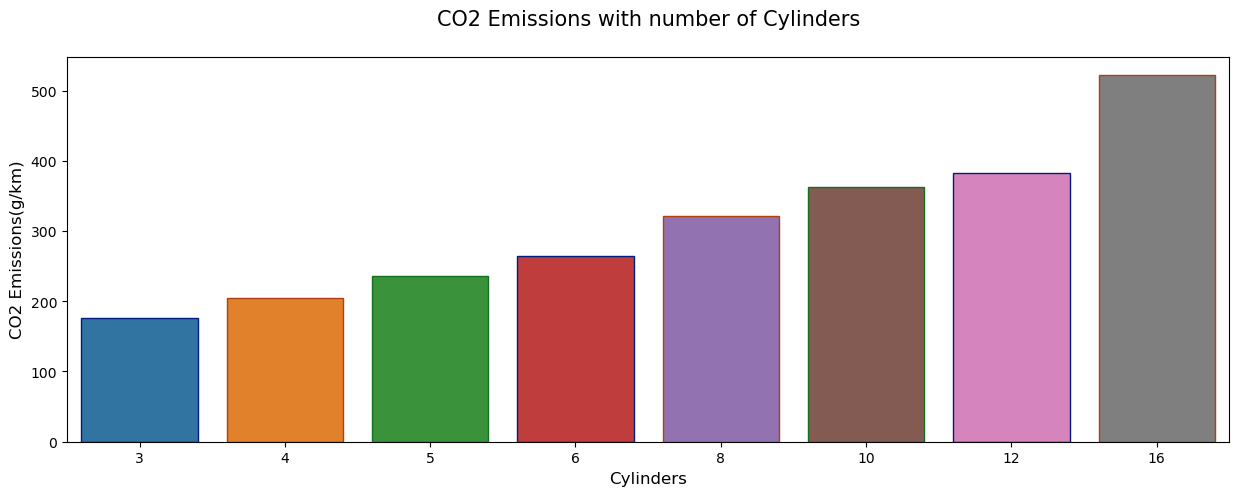

In [39]:
CO2_cylinder = df.groupby(['cylinders'])['co2_emissions'].mean().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(x = "cylinders",y="co2_emissions",data = CO2_cylinder,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with number of Cylinders\n', fontsize=15)
plt.xlabel('Cylinders', fontsize=12)
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)
plt.show()

Text(0, 0.5, 'Fuel Consumption Comb (L/100 km)')

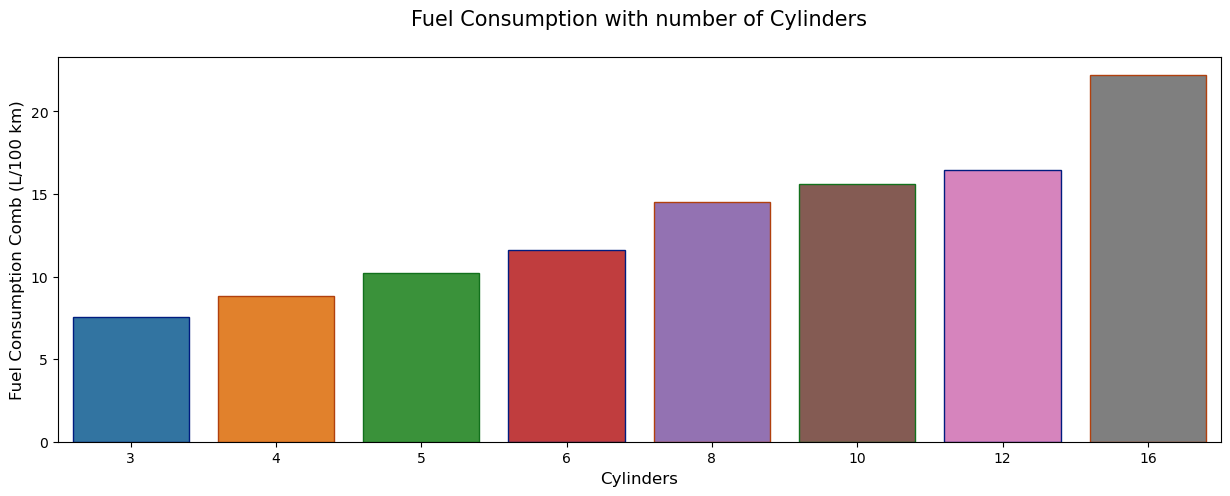

In [40]:
fuel_cylinder = df.groupby(['cylinders'])['fuel_consumption_comb(l/100km)'].mean().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(x = "cylinders",y="fuel_consumption_comb(l/100km)",data = fuel_cylinder,
            edgecolor=sns.color_palette("dark", 3))
plt.title('Fuel Consumption with number of Cylinders\n', fontsize=15)
plt.xlabel('Cylinders', fontsize=12)
plt.ylabel('Fuel Consumption Comb (L/100 km)', fontsize=12)

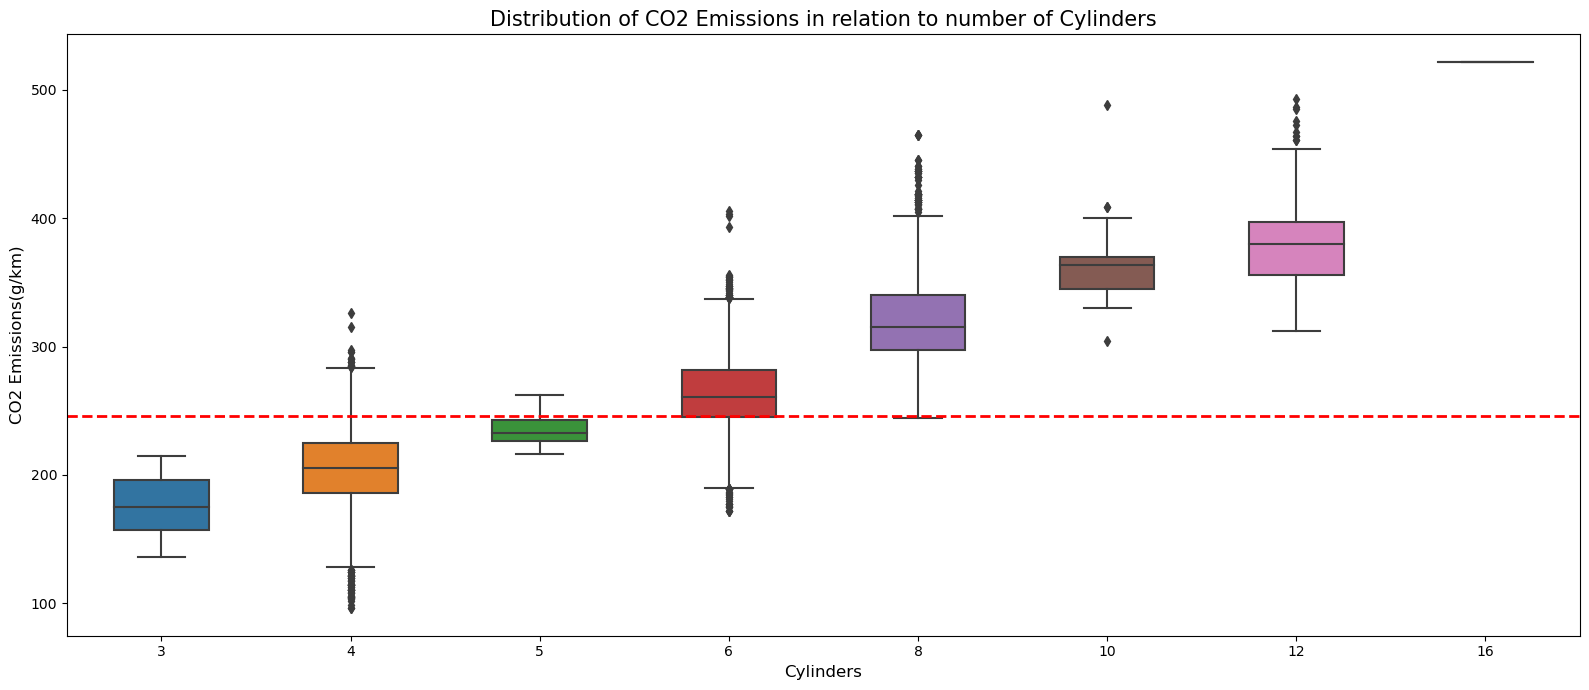

In [41]:
plt.figure(figsize=(16,7))
order = df.groupby("cylinders")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="cylinders", y="co2_emissions", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to number of Cylinders", fontsize=15)
plt.xlabel("Cylinders", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

- 1. With increase in number of Cylinders, CO2 emissions also increase proportionally.
- 2. The same trend can be observed for Cylinder vs Combined Fuel Consumption. And since Combined Fuel Consumption is strongly postively correlated with CO2 emissions, so with increase in number of cylinders, CO2 emissions also increases.
- 3. Vehicles with number of cylinders more than 5 has a median CO2 emissions greater than the sample median CO2 emissions.
- 4. Vehicles with less than 6 cylinder have almost all the sample with median CO2 emissions less than sample median.
- 5. Whereas vehicles with more than 5 cylinders have almost 100% sample with median CO2 emissions more than the sample median.

####  Feature : Engine Size

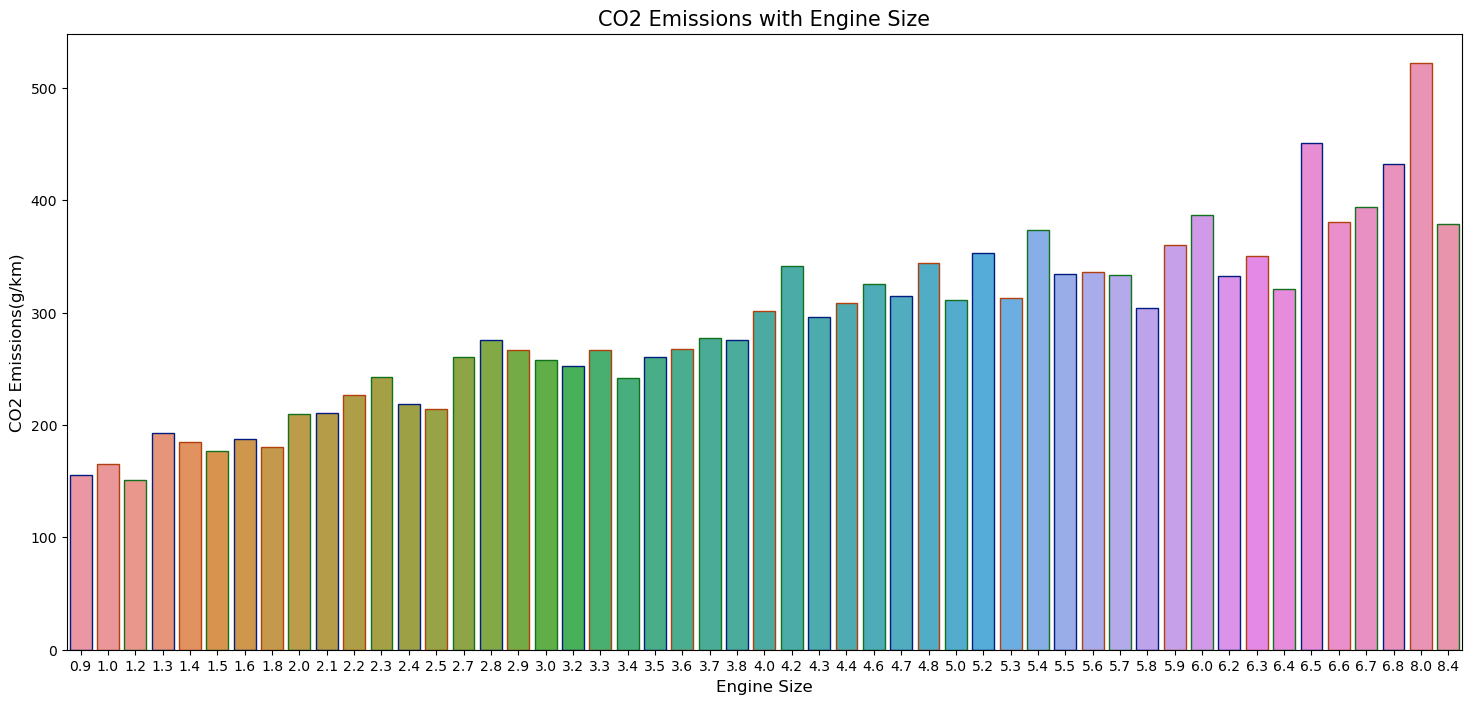

In [42]:
CO2_engine = df.groupby(['engine_size'])['co2_emissions'].mean().reset_index()

plt.figure(figsize=(18,8))
sns.barplot(x = "engine_size",y="co2_emissions",data = CO2_engine,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Engine Size', fontsize=15)
plt.xlabel('Engine Size', fontsize=12)
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)
plt.show()

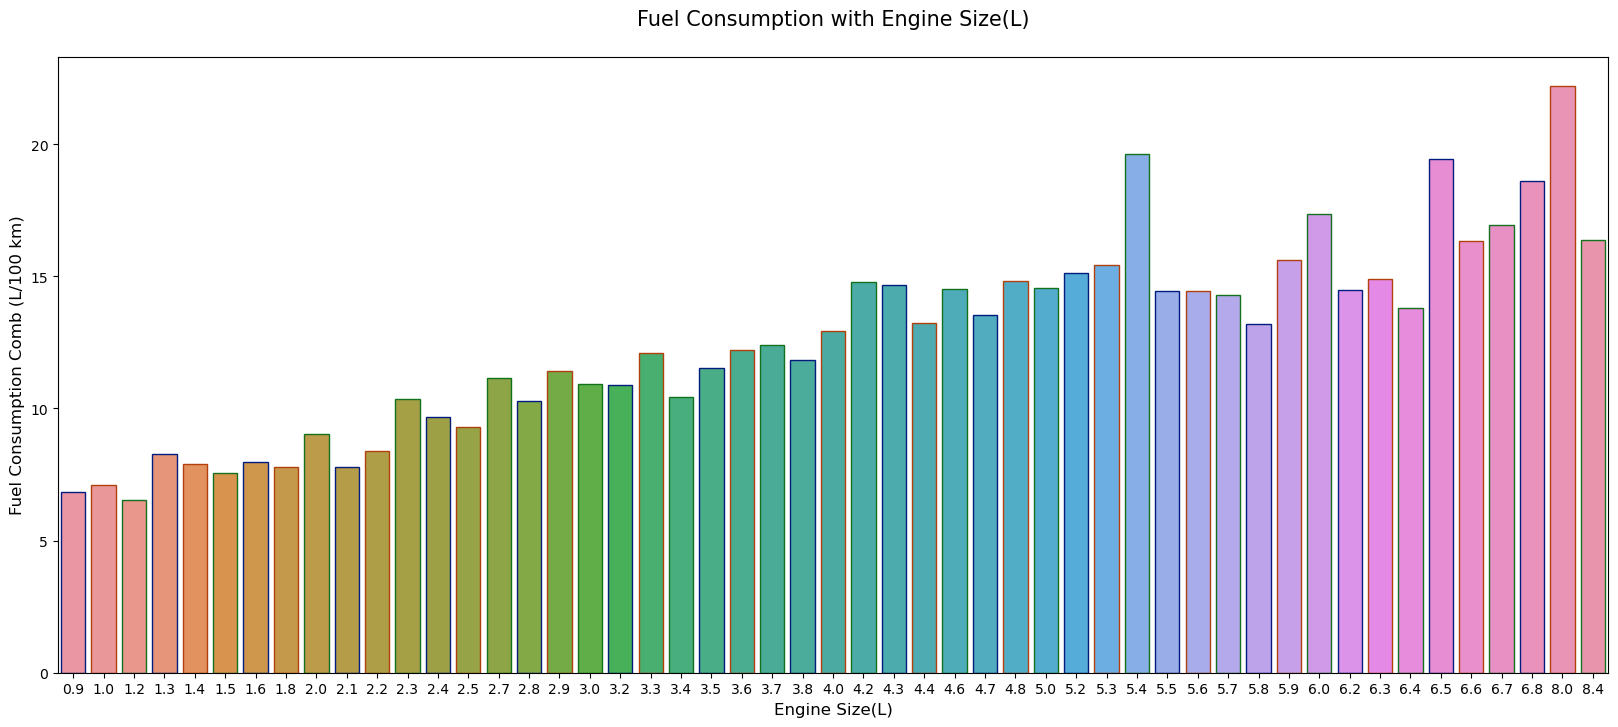

In [43]:
fuel_engine = df.groupby(['engine_size'])['fuel_consumption_comb(l/100km)'].mean().reset_index()

plt.figure(figsize=(20,8))
sns.barplot(x = "engine_size",y="fuel_consumption_comb(l/100km)",data = fuel_engine,
            edgecolor=sns.color_palette("dark", 3))
plt.title('Fuel Consumption with Engine Size(L)\n', fontsize=15)
plt.xlabel('Engine Size(L)', fontsize=12)
plt.ylabel('Fuel Consumption Comb (L/100 km)', fontsize=12)
plt.show()

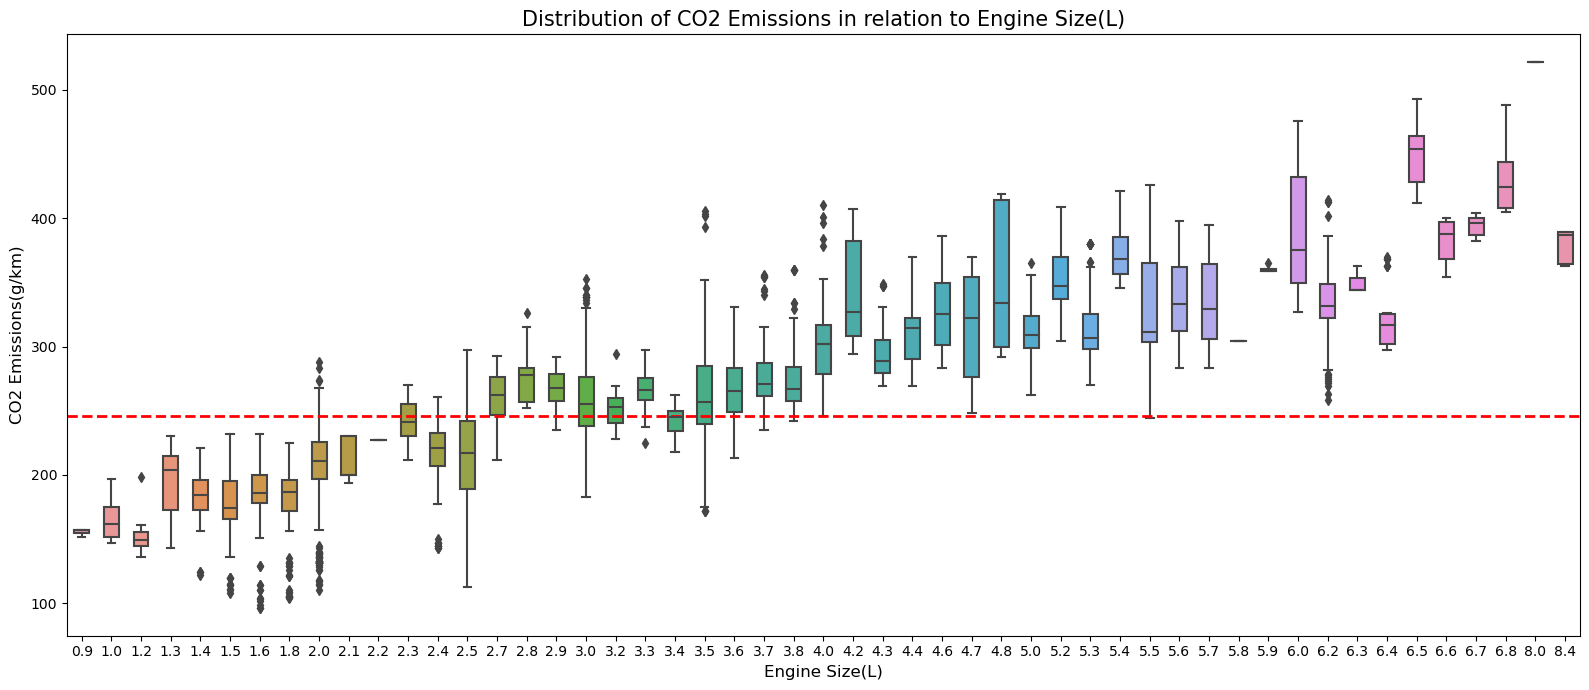

In [44]:
plt.figure(figsize=(16,7))
order = df.groupby("engine_size")["co2_emissions"].median().index
sns.boxplot(x="engine_size", y="co2_emissions", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Engine Size(L)", fontsize = 15)
plt.xlabel("Engine Size(L)", fontsize = 12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

- 1. With increase in Engine Size, CO2 emissions also increases.
- 2. The same trend can be observed for Engine Size vs Combined Fuel Consumption also. And since Combined Fuel Consumption is strongly postively correlated with CO2 emissions, so as Engine Size increases CO2 emissions also increases.
- 3. Vehicles with Engines Size more than 2.5L has a median CO2 emissions greater than or equal to the sample median CO2 emissions.

#### Feature: Fuel Consumption City

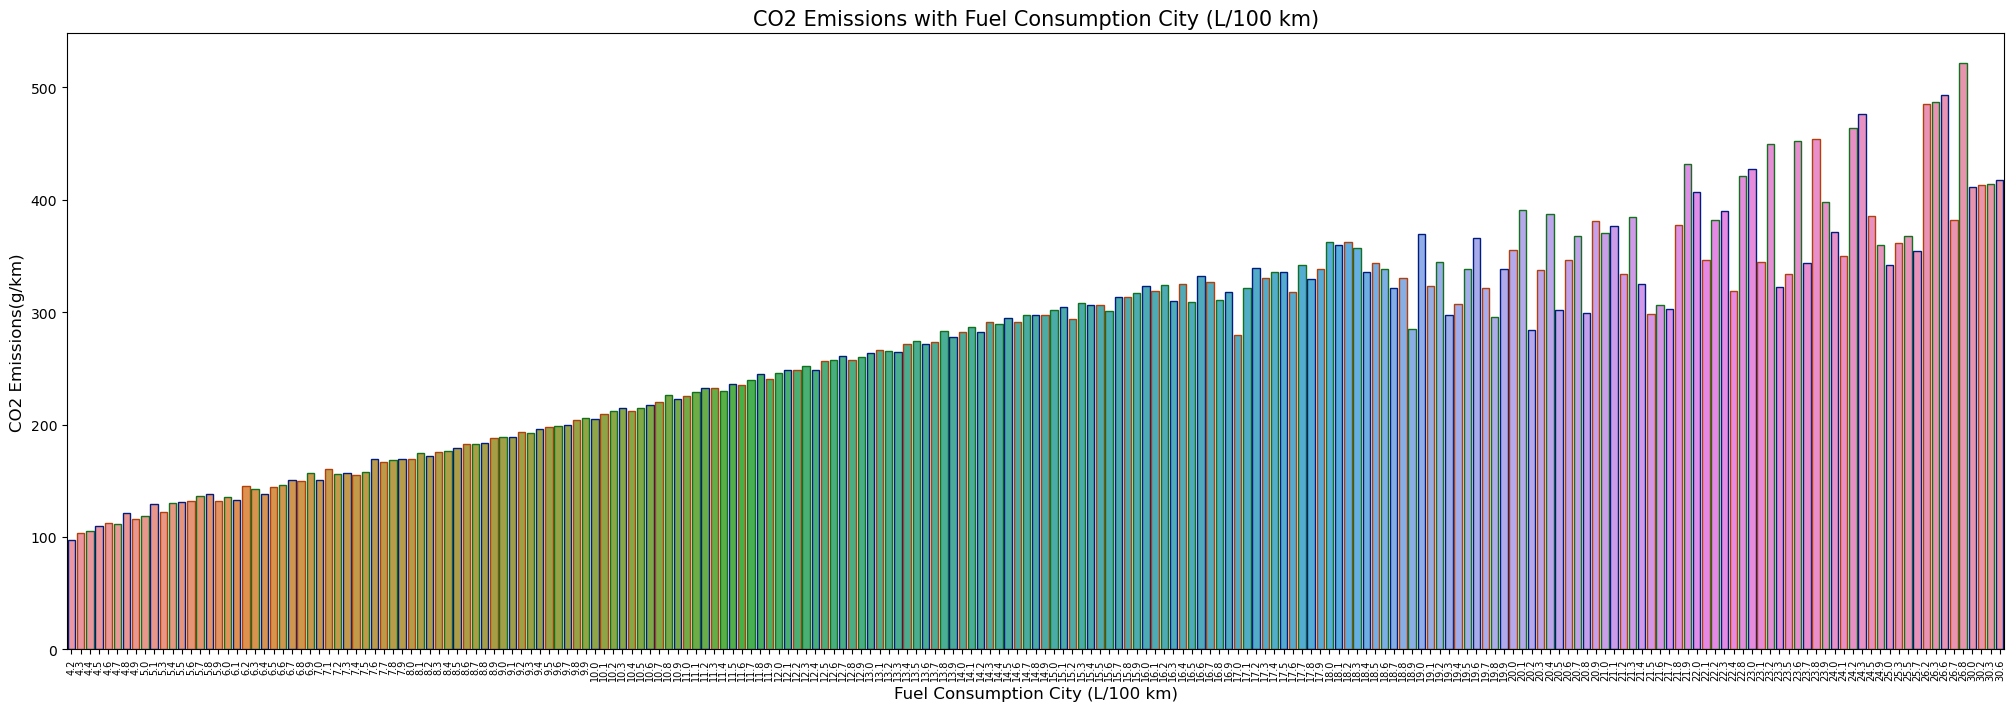

In [45]:
CO2_city = df.groupby(['fuel_consumption_city'])['co2_emissions'].mean().reset_index()

plt.figure(figsize=(25,8))
sns.barplot(x = "fuel_consumption_city", y="co2_emissions",data = CO2_city,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption City (L/100 km)', fontsize=15)
plt.xlabel('Fuel Consumption City (L/100 km)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='7')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)
plt.show()

#### Feature : Fuel Consumption Hwy (L/100 km)

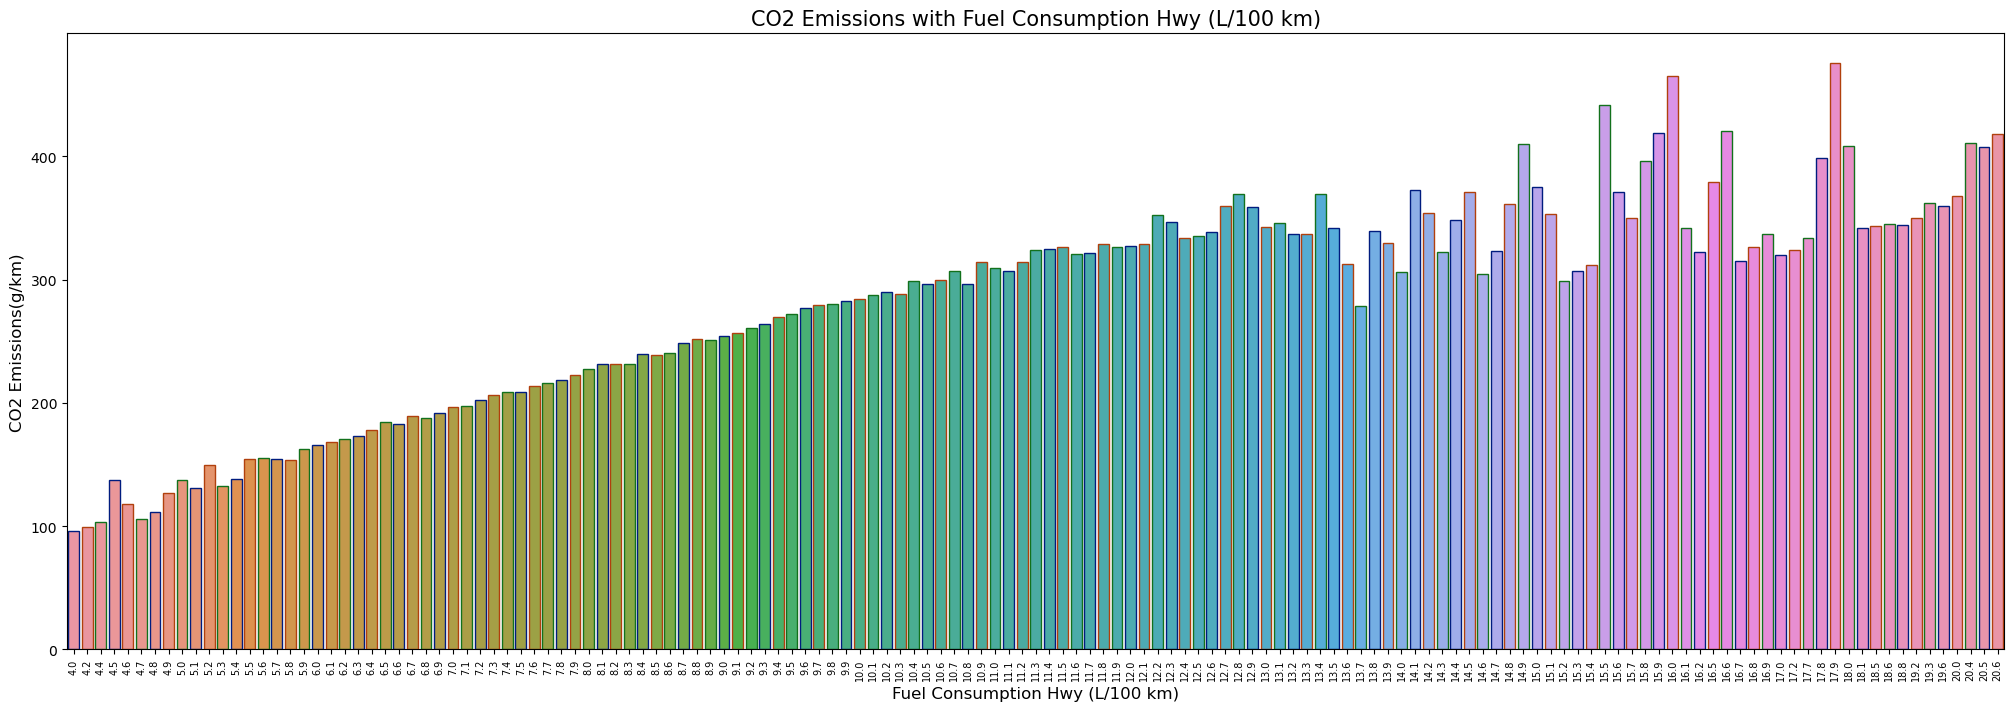

In [46]:
CO2_hwy = df.groupby(['fuel_consumption_hwy'])['co2_emissions'].mean().reset_index()

plt.figure(figsize=(25,8))
sns.barplot(x = "fuel_consumption_hwy", y="co2_emissions",data = CO2_hwy,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption Hwy (L/100 km)', fontsize=15)
plt.xlabel('Fuel Consumption Hwy (L/100 km)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='7')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)
plt.show()

#### Feature : Fuel Consumption Comb (L/100 km)

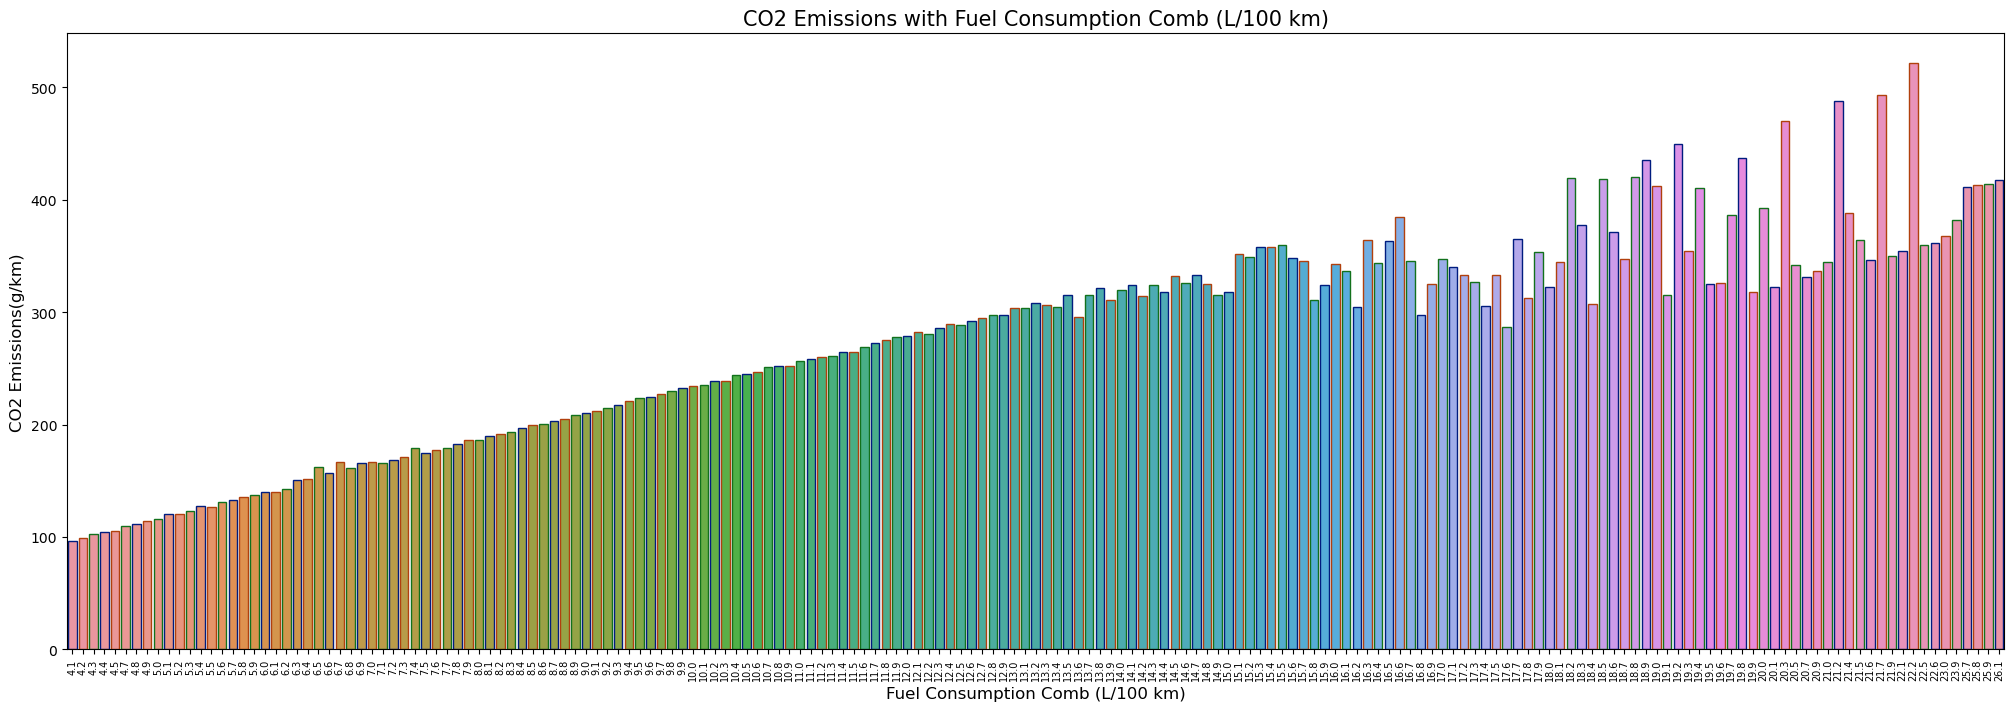

In [47]:
CO2_comb = df.groupby(['fuel_consumption_comb(l/100km)'])['co2_emissions'].mean().reset_index()

plt.figure(figsize=(25,8))
sns.barplot(x = "fuel_consumption_comb(l/100km)", y="co2_emissions",data = CO2_comb,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption Comb (L/100 km)', fontsize=15)
plt.xlabel('Fuel Consumption Comb (L/100 km)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='7')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)
plt.show()

- 1. With the increase in fuel consumption the CO2 emissions also increases.
- 2. From the plots we can see almost an linear increase in CO2 emissions with Fuel Consumption, as they are highly postively correlated.
- 3. The same trend can be observed in all the three features representing Fuel Consumption in (L/100 km).

#### Feature : Fuel Consumption Comb (mpg)

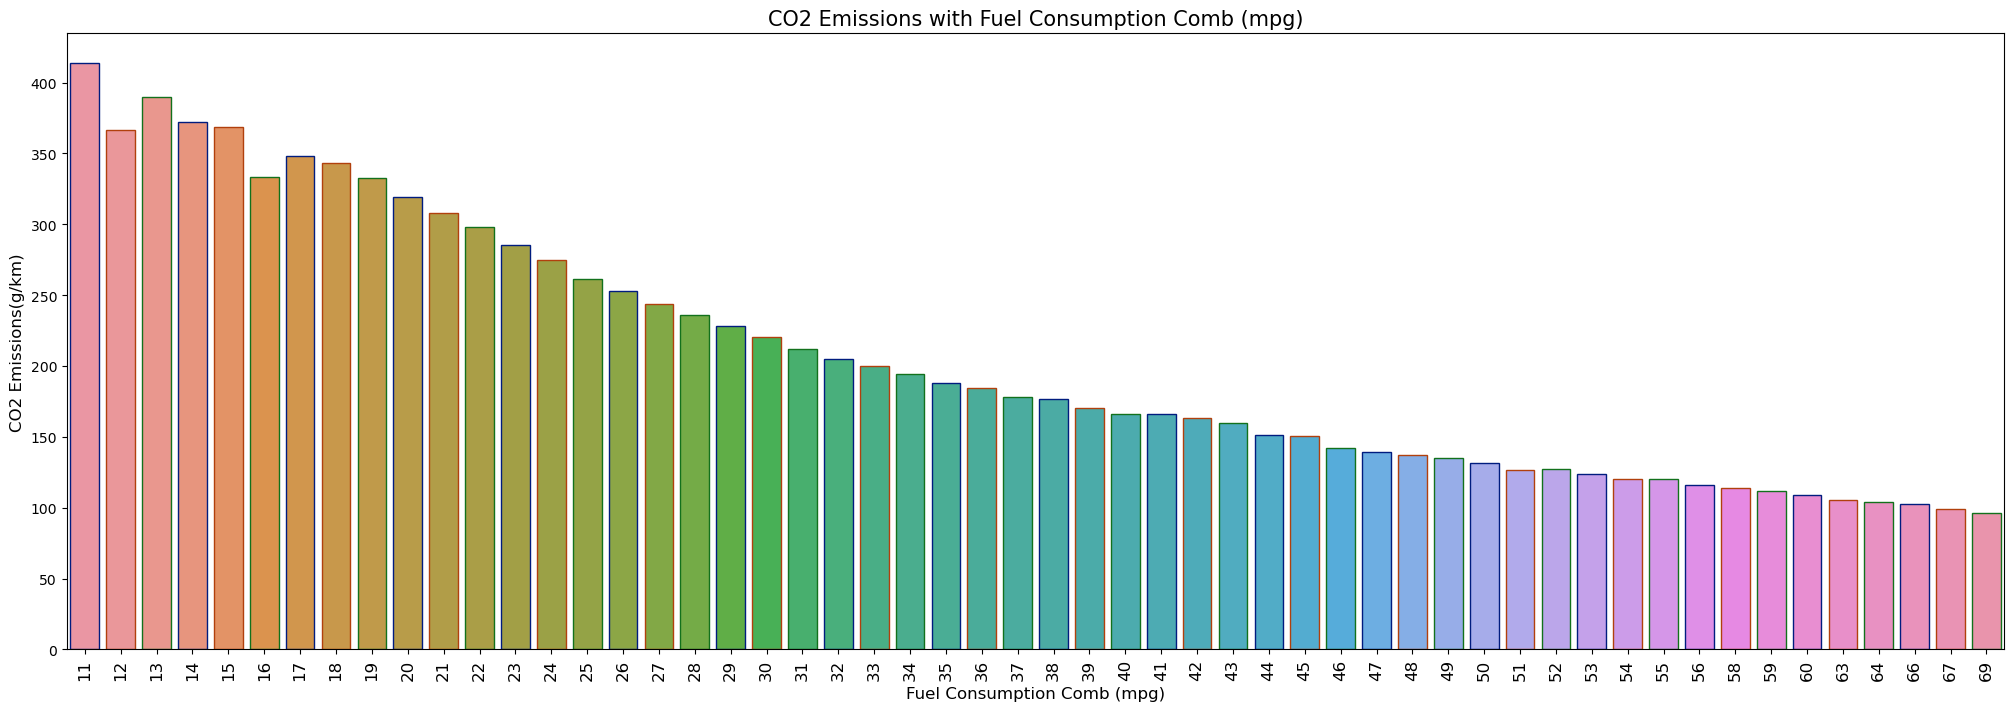

In [48]:
CO2_comb_mpg = df.groupby(['fuel_consumption_comb(mpg)'])['co2_emissions'].mean().reset_index()

plt.figure(figsize=(25,8))
sns.barplot(x = "fuel_consumption_comb(mpg)", y="co2_emissions",data = CO2_comb_mpg,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption Comb (mpg)', fontsize=15)
plt.xlabel('Fuel Consumption Comb (mpg)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='12')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)
plt.show()

- 1. As infered from the correlation matrix that CO2 Emission and Fuel Consumption Comb(mpg) are strongly negatively correlated.
- 2. The feature Fuel Consumption Comb(mpg) shows how many miles a car can go with one gallon of fuel. So less mile per gallon represents more fuel consumption. So it is logical to have negative correlation with CO2 emissions.¶
- 3. So as Fuel Consumption Comb(mpg) decreases, CO2 emissios increases.

In [49]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)',
       'fuel_consumption_comb(mpg)', 'co2_emissions'],
      dtype='object')

In [50]:
df.duplicated().sum()

0

In [51]:
df['cylinders'].value_counts()

4     2741
6     2040
8     1201
12     135
3       88
10      40
5       26
16       2
Name: cylinders, dtype: int64

In [52]:
df[df['co2_emissions']>400]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
46,AUDI,R8,TWO-SEATER,4.2,8,Manual,Premium Gasoline,21.2,13.4,17.7,16,407
48,AUDI,R8,TWO-SEATER,5.2,10,Manual,Premium Gasoline,21.1,13.8,17.8,16,409
50,AUDI,R8 SPYDER,TWO-SEATER,4.2,8,Manual,Premium Gasoline,21.2,13.4,17.7,16,407
52,AUDI,R8 SPYDER,TWO-SEATER,5.2,10,Manual,Premium Gasoline,21.1,13.8,17.8,16,409
75,BENTLEY,MULSANNE,MID-SIZE,6.8,8,Automatic with Select Shift,Premium Gasoline,22.3,14.9,19.0,15,437
...,...,...,...,...,...,...,...,...,...,...,...,...
6010,JEEP,Grand Cherokee 4X4 Trackhawk,SUV - STANDARD,6.2,8,Automatic,Premium Gasoline,20.9,13.8,17.7,16,413
6045,LAMBORGHINI,Aventador Coupe,TWO-SEATER,6.5,12,Automated Manual,Premium Gasoline,26.3,15.6,21.5,13,487
6046,LAMBORGHINI,Aventador Roadster,TWO-SEATER,6.5,12,Automated Manual,Premium Gasoline,26.6,15.8,21.7,13,493
6560,BENTLEY,Bentayga,SUV - STANDARD,6.0,12,Automatic with Select Shift,Premium Gasoline,20.0,13.8,17.2,16,401


In [53]:
for column in df.columns:
    if df[column].dtype!='object':
        UL = df[column].mean()+ 3*df[column].std()
        LL = df[column].mean()- 3*df[column].std()
        df = df[(df[column]<UL)&(df[column]>LL)]
        print(df)


       make        model   vehicle_class  engine_size  cylinders  \
0     ACURA          ILX         COMPACT          2.0          4   
1     ACURA          ILX         COMPACT          2.4          4   
2     ACURA   ILX HYBRID         COMPACT          1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL          3.5          6   
4     ACURA      RDX AWD     SUV - SMALL          3.5          6   
...     ...          ...             ...          ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL          2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL          2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL          2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD          2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD          2.0          4   

                     transmission         fuel_type  fuel_consumption_city  \
0     Automatic with Select Shift  Premium Gasoline                    9.9   
1                          

In [54]:
data1.shape[0]-df.shape[0]

357

### Label Encoding the Categorical Columns

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5916 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            5916 non-null   object 
 1   model                           5916 non-null   object 
 2   vehicle_class                   5916 non-null   object 
 3   engine_size                     5916 non-null   float64
 4   cylinders                       5916 non-null   int64  
 5   transmission                    5916 non-null   object 
 6   fuel_type                       5916 non-null   object 
 7   fuel_consumption_city           5916 non-null   float64
 8   fuel_consumption_hwy            5916 non-null   float64
 9   fuel_consumption_comb(l/100km)  5916 non-null   float64
 10  fuel_consumption_comb(mpg)      5916 non-null   int64  
 11  co2_emissions                   5916 non-null   int64  
dtypes: float64(4), int64(3), object(5)

In [56]:
le = LabelEncoder()

In [57]:
df['make'] = le.fit_transform(df['make'])
df['model'] = le.fit_transform(df['model'])
df['vehicle_class'] = le.fit_transform(df['vehicle_class'])
df['fuel_type'] = le.fit_transform(df['fuel_type'])
df['transmission'] = le.fit_transform(df['transmission'])
df

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,0,1001,0,2.0,4,2,3,9.9,6.7,8.5,33,196
1,0,1001,0,2.4,4,4,3,11.2,7.7,9.6,29,221
2,0,1002,0,1.5,4,3,3,6.0,5.8,5.9,48,136
3,0,1163,11,3.5,6,2,3,12.7,9.1,11.1,25,255
4,0,1403,11,3.5,6,2,3,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,38,1832,11,2.0,4,2,3,10.7,7.7,9.4,30,219
7381,38,1838,11,2.0,4,2,3,11.2,8.3,9.9,29,232
7382,38,1841,11,2.0,4,2,3,11.7,8.6,10.3,27,240
7383,38,1849,12,2.0,4,2,3,11.2,8.3,9.9,29,232


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5916 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            5916 non-null   int32  
 1   model                           5916 non-null   int32  
 2   vehicle_class                   5916 non-null   int32  
 3   engine_size                     5916 non-null   float64
 4   cylinders                       5916 non-null   int64  
 5   transmission                    5916 non-null   int32  
 6   fuel_type                       5916 non-null   int32  
 7   fuel_consumption_city           5916 non-null   float64
 8   fuel_consumption_hwy            5916 non-null   float64
 9   fuel_consumption_comb(l/100km)  5916 non-null   float64
 10  fuel_consumption_comb(mpg)      5916 non-null   int64  
 11  co2_emissions                   5916 non-null   int64  
dtypes: float64(4), int32(5), int64(3)


In [59]:
# Step 2: Separate the features and target variable
features = df.drop('co2_emissions', axis=1)
target = df['co2_emissions']

# Step 3: Perform correlation analysis
correlation_matrix = df.corr()
correlation_matrix_abs = correlation_matrix.abs()

In [60]:
# Step 4: Select features with high correlation to the target variable
selected_features = correlation_matrix_abs['co2_emissions'].sort_values(ascending=False)
selected_features = selected_features[selected_features != 1.0]  # Exclude the target variable itself
selected_features = selected_features.index.tolist()

In [61]:
selected_features

['fuel_consumption_comb(mpg)',
 'fuel_consumption_comb(l/100km)',
 'fuel_consumption_city',
 'fuel_consumption_hwy',
 'engine_size',
 'cylinders',
 'vehicle_class',
 'transmission',
 'make',
 'model',
 'fuel_type']

In [62]:
from sklearn.feature_selection import SelectKBest, f_regression

In [63]:
# Step 5: Use SelectKBest for additional feature selection
X = df[['fuel_consumption_hwy','fuel_consumption_comb(mpg)','fuel_consumption_city','fuel_consumption_comb(l/100km)','engine_size']]
y = df[['co2_emissions']]
k = 5  # Number of top features to select
selector = SelectKBest(f_regression, k=k)
selector.fit(X, y)

SelectKBest(k=5, score_func=<function f_regression at 0x0000017F3D78B700>)

In [64]:
# Step 6: Get the selected features using SelectKBest
selected_features_kbest = X.columns[selector.get_support()].tolist()

print("Correlation-based selected features:", selected_features)
print("SelectKBest selected features:", selected_features_kbest)

Correlation-based selected features: ['fuel_consumption_comb(mpg)', 'fuel_consumption_comb(l/100km)', 'fuel_consumption_city', 'fuel_consumption_hwy', 'engine_size', 'cylinders', 'vehicle_class', 'transmission', 'make', 'model', 'fuel_type']
SelectKBest selected features: ['fuel_consumption_hwy', 'fuel_consumption_comb(mpg)', 'fuel_consumption_city', 'fuel_consumption_comb(l/100km)', 'engine_size']


In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [66]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

# Ridge Regression
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(X_train_scaled, y_train)

# Neural Network Regression
neural_net_reg = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
neural_net_reg.fit(X_train_scaled, y_train)

# Lasso Regression
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled, y_train)

# Decision Tree Regression
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_scaled, y_train)

# Random Forest Regression
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train_scaled, y_train)

# KNN Regression
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_scaled, y_train)

# Support Vector Machines (SVM) Regression
svm_reg = SVR(kernel='rbf')
svm_reg.fit(X_train_scaled, y_train)


SVR()

In [68]:
# Step 6: Model Evaluation
models = {
    'Linear Regression': linear_reg,
    'Ridge Regression': ridge_reg,
    'Neural Network Regression': neural_net_reg,
    'Lasso Regression': lasso_reg,
    'Decision Tree Regression': tree_reg,
    'Random Forest Regression': forest_reg,
    'KNN Regression': knn_reg,
    'Support Vector Machines (SVM) Regression': svm_reg
}

In [69]:
for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{model_name} Mean Squared Error:', mse)

Linear Regression Mean Squared Error: 270.91698373658
Ridge Regression Mean Squared Error: 270.6312237873726
Neural Network Regression Mean Squared Error: 223.2010014650596
Lasso Regression Mean Squared Error: 270.04531564049415
Decision Tree Regression Mean Squared Error: 50.48113505216491
Random Forest Regression Mean Squared Error: 31.027677889517832
KNN Regression Mean Squared Error: 46.91175675675676
Support Vector Machines (SVM) Regression Mean Squared Error: 182.80685481847777


In [70]:
for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name} Mean Squared Error:', mse)
    print(f'{model_name} R-squared Score:', r2)

Linear Regression Mean Squared Error: 270.91698373658
Linear Regression R-squared Score: 0.8981556872542172
Ridge Regression Mean Squared Error: 270.6312237873726
Ridge Regression R-squared Score: 0.8982631114003004
Neural Network Regression Mean Squared Error: 223.2010014650596
Neural Network Regression R-squared Score: 0.9160932907016189
Lasso Regression Mean Squared Error: 270.04531564049415
Lasso Regression R-squared Score: 0.8984833685865719
Decision Tree Regression Mean Squared Error: 50.48113505216491
Decision Tree Regression R-squared Score: 0.9810229080690869
Random Forest Regression Mean Squared Error: 31.027677889517832
Random Forest Regression R-squared Score: 0.9883359378685981
KNN Regression Mean Squared Error: 46.91175675675676
KNN Regression R-squared Score: 0.9823647245709973
Support Vector Machines (SVM) Regression Mean Squared Error: 182.80685481847777
Support Vector Machines (SVM) Regression R-squared Score: 0.9312784372636136


In [71]:
for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    n = X_test_scaled.shape[0]
    p = X_test_scaled.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    print(f'{model_name} Mean Squared Error:', mse)
    print(f'{model_name} R-squared Score:', r2)
    print(f'{model_name} Adjusted R-squared Score:', adjusted_r2)

Linear Regression Mean Squared Error: 270.91698373658
Linear Regression R-squared Score: 0.8981556872542172
Linear Regression Adjusted R-squared Score: 0.8977234108843285
Ridge Regression Mean Squared Error: 270.6312237873726
Ridge Regression R-squared Score: 0.8982631114003004
Ridge Regression Adjusted R-squared Score: 0.8978312909902847
Neural Network Regression Mean Squared Error: 223.2010014650596
Neural Network Regression R-squared Score: 0.9160932907016189
Neural Network Regression Adjusted R-squared Score: 0.9157371501697922
Lasso Regression Mean Squared Error: 270.04531564049415
Lasso Regression R-squared Score: 0.8984833685865719
Lasso Regression Adjusted R-squared Score: 0.8980524830542568
Decision Tree Regression Mean Squared Error: 50.48113505216491
Decision Tree Regression R-squared Score: 0.9810229080690869
Decision Tree Regression Adjusted R-squared Score: 0.9809423601406874
Random Forest Regression Mean Squared Error: 31.027677889517832
Random Forest Regression R-square

In [72]:
# Create a dictionary to store the MSE for each model
mse_scores = {}

# Evaluate the models and store the MSE
for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores[model_name] = mse

# Identify the best-performing model based on the MSE
best_model_name = min(mse_scores, key=mse_scores.get)
best_model = models[best_model_name]

# Refine the best model (example: adjusting hyperparameters)
if isinstance(best_model, RandomForestRegressor):
    # Example: Adjusting the number of estimators
    best_model.set_params(n_estimators=200)

# Train the refined model
best_model.fit(X_train_scaled, y_train)

# Interpret the refined model (example: feature importance)
if isinstance(best_model, RandomForestRegressor):
    # Get feature importances
    feature_importances = best_model.feature_importances_
    # Sort feature importances in descending order
    sorted_indices = np.argsort(feature_importances)[::-1]
    # Print the importance of each feature
    for idx in sorted_indices:
        print(f'Feature: {X_train.columns[idx]}, Importance: {feature_importances[idx]}')

# Evaluate the refined model
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = best_model.score(X_test_scaled, y_test)

# Print the evaluation metrics
print(f'Best Model: {best_model_name}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')


Feature: fuel_consumption_comb(l/100km), Importance: 0.7547579760196956
Feature: fuel_consumption_comb(mpg), Importance: 0.16284252293052143
Feature: engine_size, Importance: 0.05080490975874513
Feature: fuel_consumption_city, Importance: 0.021139232169831896
Feature: fuel_consumption_hwy, Importance: 0.010455359121206034
Best Model: Random Forest Regression
Mean Squared Error: 30.994821510186274
R-squared Score: 0.9883482893842771


In [73]:
import pickle

In [74]:
# with open('best_model.pkl', 'wb') as file:
#     pickle.dump(best_model, file)

### Final Model

In [75]:
# Random Forest Regression
ran_forest = RandomForestRegressor(n_estimators=100, random_state=42)
ran_forest.fit(X_train_scaled, y_train)

y_pred = ran_forest.predict(X_test_scaled)

mean_squared_error = mean_squared_error(y_test, y_pred)
accuracy= best_model.score(X_test_scaled, y_test) 

print(f'Mean Squared Error: {mean_squared_error}')
print(f'R-squared Score: {accuracy}')


Mean Squared Error: 31.027677889517832
R-squared Score: 0.9883482893842771


In [76]:
with open('final_model.pkl', 'wb') as file:
    pickle.dump(ran_forest, file)

In [77]:
with open("standard_scaler.pkl", "wb") as file:
     pickle.dump(scaler,file)
